In [1]:
#import some libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
!pip install imbalanced-learn --upgrade
!pip install scikit-learn --upgrade
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
weather = pd.read_csv('Weather Data.csv')

C:\Users\akinw\AppData\Local\Temp\ipykernel_21148\2852254223.py:1: DtypeWarning: Columns (5,6,7,8,9,15,16,17,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pd.read_csv('Weather Data.csv')


In [3]:
weather.head()

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,YMCA,07/01/2014,1,2:30 PM,14,10.6,10.6,10.4,84,8.0,...,50,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30
1,YMCA,07/01/2014,1,3:00 PM,15,10.7,10.8,10.6,83,7.9,...,50,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30
2,YMCA,07/01/2014,1,3:30 PM,15,10.7,10.8,10.7,81,7.6,...,50,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30
3,YMCA,07/01/2014,1,4:00 PM,16,10.4,10.7,10.3,82,7.4,...,50,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30
4,YMCA,07/01/2014,1,4:30 PM,16,10.3,10.4,10.3,84,7.7,...,50,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30


In [4]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69480 entries, 0 to 69479
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Site          69480 non-null  object 
 1   Date          69480 non-null  object 
 2   Month         69480 non-null  int64  
 3   Time          69480 non-null  object 
 4   Hour          69480 non-null  object 
 5   TempOut       69480 non-null  object 
 6   HiTemp        69480 non-null  object 
 7   LowTemp       69480 non-null  object 
 8   OutHum        69480 non-null  object 
 9   DewPt         69480 non-null  object 
 10  WindSpeed     69480 non-null  int64  
 11  WindDir       69480 non-null  object 
 12  WindRun       69480 non-null  float64
 13  HiSpeed       69480 non-null  int64  
 14  HiDir         69480 non-null  object 
 15  WindChill     69480 non-null  object 
 16  HeatIndex     69480 non-null  object 
 17  THWIndex      69480 non-null  object 
 18  THSWIndex     69480 non-nu

In [5]:
weather.shape

(69480, 38)

In [6]:
weather.describe

<bound method NDFrame.describe of                 Site        Date  Month     Time  Hour TempOut HiTemp LowTemp  \
0               YMCA  07/01/2014      1  2:30 PM   14     10.6   10.6    10.4   
1               YMCA  07/01/2014      1  3:00 PM   15     10.7   10.8    10.6   
2               YMCA  07/01/2014      1  3:30 PM   15     10.7   10.8    10.7   
3               YMCA  07/01/2014      1  4:00 PM   16     10.4   10.7    10.3   
4               YMCA  07/01/2014      1  4:30 PM   16     10.3   10.4    10.3   
...              ...         ...    ...      ...   ...     ...    ...     ...   
69475  Easthill Road  05/08/2014      8  6:00 PM   18      ---    ---     ---   
69476  Easthill Road  05/08/2014      8  6:30 PM   18      ---    ---     ---   
69477  Easthill Road  05/08/2014      8  7:00 PM   19      ---    ---     ---   
69478  Easthill Road  05/08/2014      8  7:30 PM   19      ---    ---     ---   
69479  Easthill Road  05/08/2014      8  8:00 PM   20      ---    ---     -

## conversion of the columns data type

In [7]:
#convert date column to datetime data type
weather['Date'] = pd.to_datetime(weather['Date'], format='%d/%m/%Y')
weather

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,YMCA,2014-01-07,1,2:30 PM,14,10.6,10.6,10.4,84,8.0,...,50,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30
1,YMCA,2014-01-07,1,3:00 PM,15,10.7,10.8,10.6,83,7.9,...,50,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30
2,YMCA,2014-01-07,1,3:30 PM,15,10.7,10.8,10.7,81,7.6,...,50,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30
3,YMCA,2014-01-07,1,4:00 PM,16,10.4,10.7,10.3,82,7.4,...,50,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30
4,YMCA,2014-01-07,1,4:30 PM,16,10.3,10.4,10.3,84,7.7,...,50,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69475,Easthill Road,2014-08-05,8,6:00 PM,18,---,---,---,---,---,...,31,9.9,27.8,6.15,0.0720,0.00,0,1,0.0,30
69476,Easthill Road,2014-08-05,8,6:30 PM,18,---,---,---,---,---,...,32,9.8,27.1,6.30,0.0722,0.00,0,1,0.0,30
69477,Easthill Road,2014-08-05,8,7:00 PM,19,---,---,---,---,---,...,33,9.8,26.6,6.49,0.0723,0.00,0,1,0.0,30
69478,Easthill Road,2014-08-05,8,7:30 PM,19,---,---,---,---,---,...,33,9.5,26.2,6.51,0.0724,0.00,0,2,0.0,30


In [8]:
# convert the 'Time' column to datetime, which understands AM/PM
weather['Time'] = pd.to_datetime(weather['Time'], format='%I:%M %p')

# format these datetime objects to strings in a 24-hour format
weather['Time'] = weather['Time'].dt.strftime('%H:%M')

## encode the WindDir column with LABEL ENCODER

In [9]:
# replacing '---' with NaN in the dataframe
weather.replace('---', np.nan, inplace=True)

In [10]:
# Initialize the LabelEncoder
le_winddir = LabelEncoder()

# Placeholder for NaN values, using a unique string unlikely to appear in your data
placeholder = "TEMP_PLACEHOLDER"

# Function to encode a column starting from 1 and leave NaN as NaN
def encode_column(df, column_name, label_encoder):
    # Replace NaN with a temporary placeholder
    temp_series = df[column_name].fillna(placeholder)
    
    # Fit and transform the data, then shift it to start from 1
    encoded_series = pd.Series(label_encoder.fit_transform(temp_series)) + 1
    
    # Replace placeholder values back to NaN
    encoded_series[temp_series == placeholder] = np.nan
    
    return encoded_series.astype(pd.Int64Dtype())  # Use Int64 dtype to support NaN

# Apply the encoding function to WindDir and HiDir columns
weather['WindDir_encoded'] = encode_column(weather, 'WindDir', le_winddir)

In [11]:
weather.head()

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt,WindDir_encoded
0,YMCA,2014-01-07,1,14:30,14,10.6,10.6,10.4,84,8.0,...,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30,16
1,YMCA,2014-01-07,1,15:00,15,10.7,10.8,10.6,83,7.9,...,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30,16
2,YMCA,2014-01-07,1,15:30,15,10.7,10.8,10.7,81,7.6,...,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30,15
3,YMCA,2014-01-07,1,16:00,16,10.4,10.7,10.3,82,7.4,...,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30,8
4,YMCA,2014-01-07,1,16:30,16,10.3,10.4,10.3,84,7.7,...,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30,16


In [12]:
weather[['WindDir', 'WindDir_encoded']].head()

,WindDir,WindDir_encoded
0,WNW,16
1,WNW,16
2,W,15
3,NW,8
4,WNW,16


## Handling the errors been seen as object and converting the columns to numeric

In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69480 entries, 0 to 69479
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Site             69480 non-null  object        
 1   Date             69480 non-null  datetime64[ns]
 2   Month            69480 non-null  int64         
 3   Time             69480 non-null  object        
 4   Hour             69480 non-null  object        
 5   TempOut          67809 non-null  object        
 6   HiTemp           67819 non-null  object        
 7   LowTemp          67819 non-null  object        
 8   OutHum           67810 non-null  object        
 9   DewPt            67809 non-null  object        
 10  WindSpeed        69480 non-null  int64         
 11  WindDir          60043 non-null  object        
 12  WindRun          69480 non-null  float64       
 13  HiSpeed          69480 non-null  int64         
 14  HiDir            60046 non-null  objec

In [14]:
# List of columns to exclude from being converted to numeric
columns_to_exclude = ['Site', 'Date', 'Month', 'Time', 'Hour', 'WindDir', 'HiDir', 'THSWIndex']

# Iterate over all columns in the DataFrame
for column in weather.columns:
    # Convert column to numeric if it's not in the list of columns to exclude
    if column not in columns_to_exclude:
        weather[column] = pd.to_numeric(weather[column], errors='coerce')


## drop the columns that are not needed

In [15]:
weather.columns

Index(['Site', 'Date', 'Month', 'Time', 'Hour', 'TempOut', 'HiTemp', 'LowTemp',
       'OutHum', 'DewPt', 'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed',
       'HiDir', 'WindChill', 'HeatIndex', 'THWIndex', 'THSWIndex', 'Bar',
       'Rain', 'RainRate', 'SolarRad', 'SolarEnergy', 'HiSolarRad', 'HeatD-D',
       'CoolD-D', 'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC',
       'InAirDensity', 'ET', 'WindSamp', 'WindTx', 'ISSRecept', 'ArcInt',
       'WindDir_encoded'],
      dtype='object')

In [16]:
columns_to_drop = (['HiTemp', 'LowTemp', 'WindDir', 'HiSpeed', 'HiDir', 'THWIndex', 'THSWIndex', 'HiSolarRad', 'HeatD-D',
       'CoolD-D', 'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC', 'InAirDensity', 'ET', 'WindSamp', 'WindTx', 'ISSRecept', 'ArcInt'])
weather_1 = weather.drop(columns_to_drop, axis=1, errors='ignore')
weather_1.head()

,Site,Date,Month,Time,Hour,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,Bar,Rain,RainRate,SolarRad,SolarEnergy,WindDir_encoded
0,YMCA,2014-01-07,1,14:30,14,10.6,84.0,8.0,5,2.5,9.7,10.6,747.8,0.0,0.0,32.0,1.38,16
1,YMCA,2014-01-07,1,15:00,15,10.7,83.0,7.9,6,3.0,9.5,10.7,748.0,0.0,0.0,20.0,0.86,16
2,YMCA,2014-01-07,1,15:30,15,10.7,81.0,7.6,6,3.0,9.6,10.7,747.9,0.0,0.0,22.0,0.95,15
3,YMCA,2014-01-07,1,16:00,16,10.4,82.0,7.4,5,2.5,9.4,10.4,748.2,0.0,0.0,8.0,0.34,8
4,YMCA,2014-01-07,1,16:30,16,10.3,84.0,7.7,5,2.5,9.3,10.3,748.4,0.0,0.0,0.0,0.00,16


In [17]:
weather_1.to_csv('weather_1.csv', index=False)

## Checking and Handling the Missing Values using INTERPOLATION

In [18]:
weather_1.isnull().values.any() # check if there is missing value

True

In [19]:
weather_1.isnull().sum()   #no of missing values for each column

Site                  0
Date                  0
Month                 0
Time                  0
Hour                  0
TempOut            1671
OutHum             1670
DewPt              1671
WindSpeed             0
WindRun               0
WindChill          1671
HeatIndex          1671
Bar                   0
Rain                  0
RainRate              0
SolarRad           1668
SolarEnergy        1668
WindDir_encoded    9437
dtype: int64

In [20]:
#copy of the dataframe to be 'weather_interpolated'
weather_2 = weather_1.copy()

In [21]:
# Define columns to exclude from interpolation
exclude_columns = ['Site', 'Date', 'Month', 'Time', 'Hour']  # Including 'Time' and 'Hour' if they're separate from the index

# Interpolate numeric columns excluding specified ones
# Ensure to only include columns with numeric data for interpolation
columns_to_interpolate = weather_2.select_dtypes(include=[np.number]).columns.difference(exclude_columns)

for col in columns_to_interpolate:  #this convert columns with <NA> to float making them compatible with np.nan and avoiding issues with data types that don't support <NA>
    if pd.api.types.is_integer_dtype(weather_2[col]):
        weather_2[col] = weather_2[col].astype(float)

# Apply interpolation
weather_2[columns_to_interpolate] = weather_2[columns_to_interpolate].interpolate(method='linear')

In [22]:
weather_2.isnull().sum()  # re-confirm if there is still missing value

Site               0
Date               0
Month              0
Time               0
Hour               0
TempOut            0
OutHum             0
DewPt              0
WindSpeed          0
WindRun            0
WindChill          0
HeatIndex          0
Bar                0
Rain               0
RainRate           0
SolarRad           0
SolarEnergy        0
WindDir_encoded    0
dtype: int64

## check for duplicated values

In [23]:
weather_2.duplicated().sum() #check for duplicates and their is none

0

## check for outliers

In [24]:
weather

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt,WindDir_encoded
0,YMCA,2014-01-07,1,14:30,14,10.6,10.6,10.4,84.0,8.0,...,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30,16
1,YMCA,2014-01-07,1,15:00,15,10.7,10.8,10.6,83.0,7.9,...,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30,16
2,YMCA,2014-01-07,1,15:30,15,10.7,10.8,10.7,81.0,7.6,...,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30,15
3,YMCA,2014-01-07,1,16:00,16,10.4,10.7,10.3,82.0,7.4,...,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30,8
4,YMCA,2014-01-07,1,16:30,16,10.3,10.4,10.3,84.0,7.7,...,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69475,Easthill Road,2014-08-05,8,18:00,18,NaN,NaN,NaN,NaN,NaN,...,9.9,27.8,6.15,0.0720,0.00,0,1,0.0,30,<NA>
69476,Easthill Road,2014-08-05,8,18:30,18,NaN,NaN,NaN,NaN,NaN,...,9.8,27.1,6.30,0.0722,0.00,0,1,0.0,30,<NA>
69477,Easthill Road,2014-08-05,8,19:00,19,NaN,NaN,NaN,NaN,NaN,...,9.8,26.6,6.49,0.0723,0.00,0,1,0.0,30,<NA>
69478,Easthill Road,2014-08-05,8,19:30,19,NaN,NaN,NaN,NaN,NaN,...,9.5,26.2,6.51,0.0724,0.00,0,2,0.0,30,<NA>


In [25]:
# Function to find and return only the outlier values in the 'TempOut' column
def find_outhum_outliers(df):
    Q1 = df['OutHum'].quantile(0.25)
    Q3 = df['OutHum'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5 * IQR
    upper_bound = Q3 + 2.5 * IQR
    outlier_values = df['OutHum'][(df['OutHum'] < lower_bound) | (df['OutHum'] > upper_bound)]
    return outlier_values

# Find and print outlier values in 'TempOut'
outliers_outhum = find_outhum_outliers(weather_2)
print("Outliers in OutHum:\n", outliers_outhum)


Outliers in OutHum:
 Series([], Name: OutHum, dtype: float64)


In [26]:
min_max_values = weather_2.agg(['min', 'max'])  ##by checking the minimum and maximum values if it is normal
min_max_values

,Site,Date,Month,Time,Hour,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,Bar,Rain,RainRate,SolarRad,SolarEnergy,WindDir_encoded
min,Easthill Road,2013-11-25,1,00:00,-,-2.3,29.0,-3.4,0.0,0.0,-2.3,-2.4,727.0,0.00,0.0,0.0,0.00,1.0
max,YMCA,2014-11-30,12,23:30,9,32.8,99.0,20.7,18.0,9.0,32.8,34.9,776.8,93.22,2090.2,1004.0,43.18,17.0


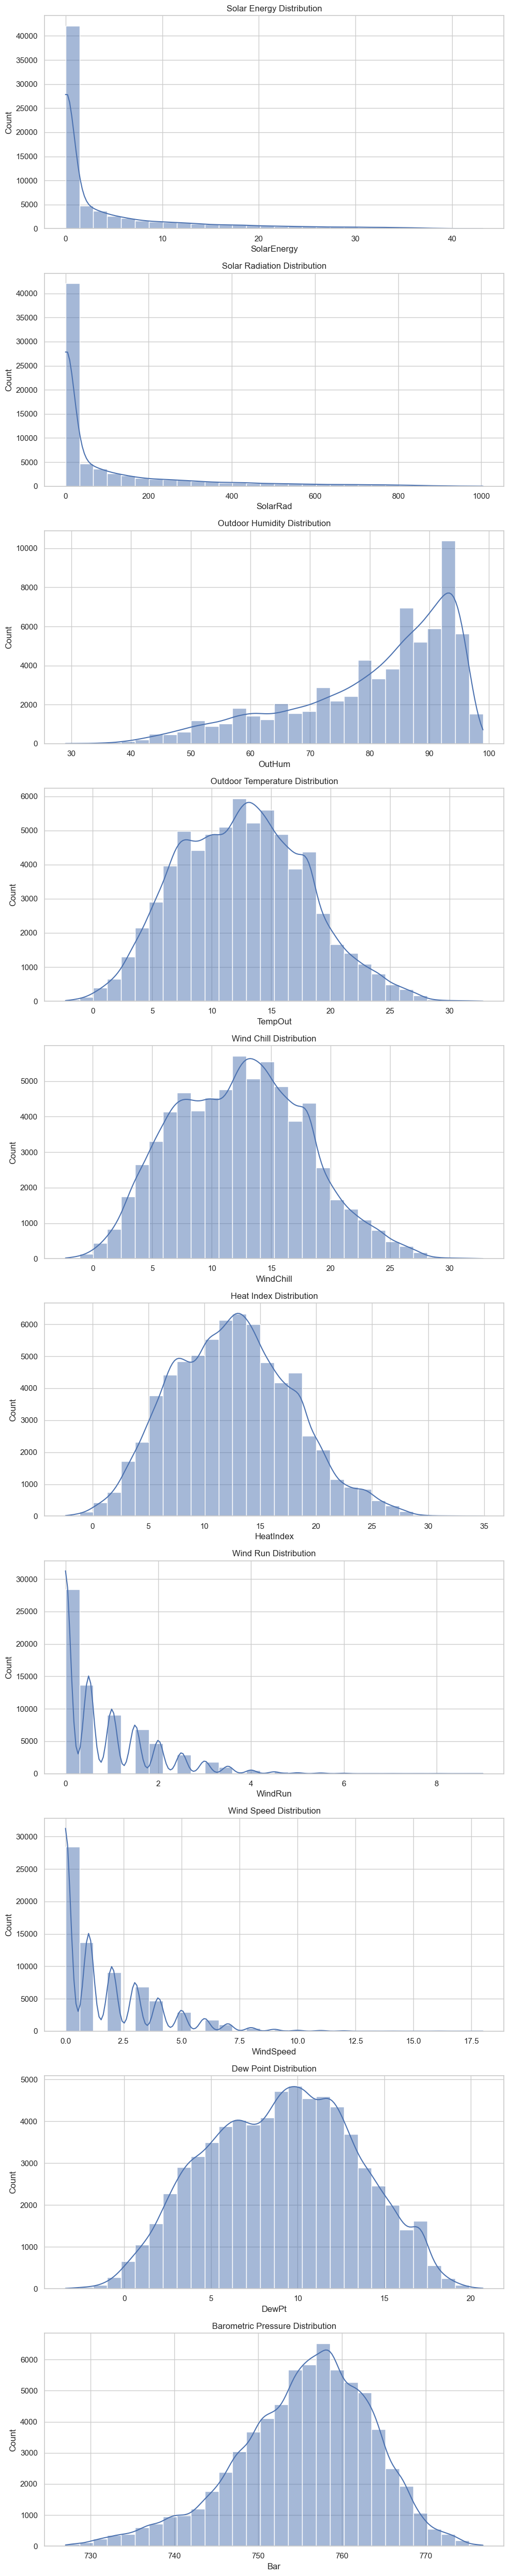

In [27]:
# Assuming 'weather_2' is the same as the cleaned data we have, which is 'data_cleaned'
# Adjusting to plot each distribution on its own for clarity

variables_to_plot = ['SolarEnergy', 'SolarRad', 'OutHum', 'TempOut', 'WindChill', 'HeatIndex', 'WindRun', 'WindSpeed', 'DewPt', 'Bar']
titles = ['Solar Energy Distribution', 'Solar Radiation Distribution', 'Outdoor Humidity Distribution', 'Outdoor Temperature Distribution',
          'Wind Chill Distribution', 'Heat Index Distribution', 'Wind Run Distribution',
          'Wind Speed Distribution', 'Dew Point Distribution', 'Barometric Pressure Distribution']

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the distributions of selected variables
fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(10, 5*len(variables_to_plot)))

for i, var in enumerate(variables_to_plot):
    sns.histplot(weather_2[var], bins=30, kde=True, ax=axes[i]).set(title=titles[i])

plt.tight_layout()
plt.show()


In [28]:
weather_2.to_csv('weatherinterpol.csv', index=False)

## separating the independent variables and target variable

In [29]:
weather_2.columns

Index(['Site', 'Date', 'Month', 'Time', 'Hour', 'TempOut', 'OutHum', 'DewPt',
       'WindSpeed', 'WindRun', 'WindChill', 'HeatIndex', 'Bar', 'Rain',
       'RainRate', 'SolarRad', 'SolarEnergy', 'WindDir_encoded'],
      dtype='object')

In [30]:
# Columns to drop
columns_to_drop = ['Site', 'Date', 'Month', 'Time', 'Hour']

# Drop the specified columns
weather_3 = weather_2.drop(columns_to_drop, axis=1)

# Display the first few rows of the DataFrame to verify the columns are dropped
weather_3.head()

,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,Bar,Rain,RainRate,SolarRad,SolarEnergy,WindDir_encoded
0,10.6,84.0,8.0,5.0,2.5,9.7,10.6,747.8,0.0,0.0,32.0,1.38,16.0
1,10.7,83.0,7.9,6.0,3.0,9.5,10.7,748.0,0.0,0.0,20.0,0.86,16.0
2,10.7,81.0,7.6,6.0,3.0,9.6,10.7,747.9,0.0,0.0,22.0,0.95,15.0
3,10.4,82.0,7.4,5.0,2.5,9.4,10.4,748.2,0.0,0.0,8.0,0.34,8.0
4,10.3,84.0,7.7,5.0,2.5,9.3,10.3,748.4,0.0,0.0,0.0,0.00,16.0


In [31]:
X = weather_3.loc[:, ['TempOut', 'OutHum', 'DewPt',
       'WindSpeed', 'WindRun', 'WindChill', 'HeatIndex', 'Bar', 'Rain',
       'RainRate', 'WindDir_encoded', 'SolarRad']]
y = weather_3.loc[:, 'SolarEnergy']

In [32]:
X

,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,Bar,Rain,RainRate,WindDir_encoded,SolarRad
0,10.6,84.0,8.0,5.0,2.5,9.7,10.6,747.8,0.0,0.0,16.0,32.0
1,10.7,83.0,7.9,6.0,3.0,9.5,10.7,748.0,0.0,0.0,16.0,20.0
2,10.7,81.0,7.6,6.0,3.0,9.6,10.7,747.9,0.0,0.0,15.0,22.0
3,10.4,82.0,7.4,5.0,2.5,9.4,10.4,748.2,0.0,0.0,8.0,8.0
4,10.3,84.0,7.7,5.0,2.5,9.3,10.3,748.4,0.0,0.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69475,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.4,0.0,0.0,5.0,0.0
69476,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.4,0.0,0.0,5.0,0.0
69477,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.2,0.0,0.0,5.0,0.0
69478,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.2,0.0,0.0,5.0,0.0


## conversion of target variable to binary to check for data balancing

In [33]:
## convert the data to 0s and 1s
weather_2['SolarEnergy'] = weather_2['SolarEnergy'].map(lambda x: 0 if x == 0.0 else 1)
weather_2['SolarEnergy']

0        1
1        1
2        1
3        1
4        0
        ..
69475    0
69476    0
69477    0
69478    0
69479    0
Name: SolarEnergy, Length: 69480, dtype: int64

In [34]:
weather_2['SolarEnergy'].value_counts()  # with the value below, there is no need of balancing the dataset as it is ok

SolarEnergy
1    36143
0    33337
Name: count, dtype: int64

## feature selection using correlation matrix

In [35]:
weather_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69480 entries, 0 to 69479
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TempOut          69480 non-null  float64
 1   OutHum           69480 non-null  float64
 2   DewPt            69480 non-null  float64
 3   WindSpeed        69480 non-null  float64
 4   WindRun          69480 non-null  float64
 5   WindChill        69480 non-null  float64
 6   HeatIndex        69480 non-null  float64
 7   Bar              69480 non-null  float64
 8   Rain             69480 non-null  float64
 9   RainRate         69480 non-null  float64
 10  SolarRad         69480 non-null  float64
 11  SolarEnergy      69480 non-null  float64
 12  WindDir_encoded  69480 non-null  float64
dtypes: float64(13)
memory usage: 6.9 MB


In [36]:
correlation_matrix = weather_3.corr()

In [37]:
correlation_matrix

,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,Bar,Rain,RainRate,SolarRad,SolarEnergy,WindDir_encoded
TempOut,1.000000,-0.585974,0.839663,-0.030617,-0.030608,0.996464,0.998060,0.274957,0.006173,0.023514,0.475921,0.475928,-0.082903
OutHum,-0.585974,1.000000,-0.059278,-0.148983,-0.148987,-0.576900,-0.543774,-0.238129,0.032161,0.015272,-0.657413,-0.657416,0.075408
DewPt,0.839663,-0.059278,1.000000,-0.128952,-0.128943,0.840928,0.865714,0.184971,0.027796,0.039150,0.137295,0.137302,-0.051014
WindSpeed,-0.030617,-0.148983,-0.128952,1.000000,0.999998,-0.095945,-0.040715,-0.352309,0.001711,-0.010898,0.181473,0.181473,0.220098
WindRun,-0.030608,-0.148987,-0.128943,0.999998,1.000000,-0.095936,-0.040706,-0.352323,0.001712,-0.010898,0.181477,0.181477,0.220108
WindChill,0.996464,-0.576900,0.840928,-0.095945,-0.095936,1.000000,0.994590,0.301917,0.005368,0.023338,0.469943,0.469951,-0.097070
HeatIndex,0.998060,-0.543774,0.865714,-0.040715,-0.040706,0.994590,1.000000,0.266338,0.008714,0.026454,0.451618,0.451626,-0.081205
Bar,0.274957,-0.238129,0.184971,-0.352309,-0.352323,0.301917,0.266338,1.000000,-0.021665,-0.005319,0.133849,0.133843,-0.101914
Rain,0.006173,0.032161,0.027796,0.001711,0.001712,0.005368,0.008714,-0.021665,1.000000,0.691257,-0.016063,-0.016062,-0.015508
RainRate,0.023514,0.015272,0.039150,-0.010898,-0.010898,0.023338,0.026454,-0.005319,0.691257,1.000000,-0.010266,-0.010264,-0.016284


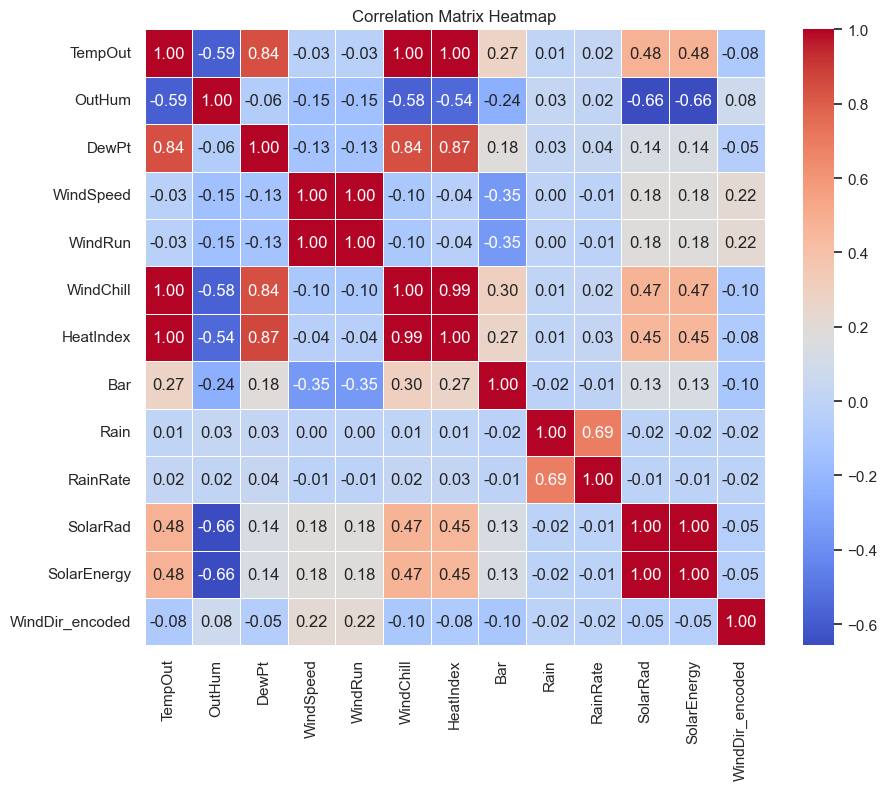

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## feature selection correlation using ANOVA

In [39]:
from sklearn.feature_selection import f_regression, SelectKBest
 
# Apply ANOVA F-test
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(X, y)
 
# Get and print feature scores
feature_scores = pd.concat([pd.DataFrame(X.columns), pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['Feature','Score']
feature_scores.nlargest(X.shape[1],'Score').reset_index(drop=True)

,Feature,Score
0,SolarRad,8.101723e+10
1,OutHum,5.288446e+04
2,TempOut,2.034575e+04
3,WindChill,1.969395e+04
4,HeatIndex,1.780215e+04
5,WindRun,2.366110e+03
6,WindSpeed,2.365993e+03
7,DewPt,1.334951e+03
8,Bar,1.267332e+03
9,WindDir_encoded,1.575919e+02


In [40]:
# Drop the variables that have negative correlation

X = X.drop(['WindDir_encoded', 'Rain', 'RainRate'], axis=1)
X

,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,Bar,SolarRad
0,10.6,84.0,8.0,5.0,2.5,9.7,10.6,747.8,32.0
1,10.7,83.0,7.9,6.0,3.0,9.5,10.7,748.0,20.0
2,10.7,81.0,7.6,6.0,3.0,9.6,10.7,747.9,22.0
3,10.4,82.0,7.4,5.0,2.5,9.4,10.4,748.2,8.0
4,10.3,84.0,7.7,5.0,2.5,9.3,10.3,748.4,0.0
...,...,...,...,...,...,...,...,...,...
69475,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.4,0.0
69476,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.4,0.0
69477,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.2,0.0
69478,18.1,94.0,17.1,0.0,0.0,18.1,18.7,758.2,0.0


## Splitting the dataset into train and test

In [41]:
from sklearn.model_selection import train_test_split

#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Normalising the Feature Variable

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the training data by initialising MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the training features and transform 
X_train_scaled = scaler.fit_transform(X_train)

# transform the test features using the same scaler
X_test_scaled = scaler.transform(X_test)

In [43]:
# Assigning the normalisation back to X_train and X_test
X_train = X_train_scaled
X_test = X_test_scaled

In [44]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [45]:
X_train

,TempOut,OutHum,DewPt,WindSpeed,WindRun,WindChill,HeatIndex,Bar,SolarRad
0,0.415954,0.914286,0.605809,0.166667,0.166667,0.415954,0.396783,0.684739,0.000000
1,0.225071,0.900000,0.323651,0.222222,0.222222,0.185185,0.214477,0.222892,0.000000
2,0.529915,0.814286,0.717842,0.055556,0.055556,0.529915,0.504021,0.544177,0.000000
3,0.569801,0.685714,0.705394,0.166667,0.166667,0.569801,0.541555,0.779116,0.226226
4,0.407407,0.642857,0.452282,0.111111,0.111111,0.407407,0.378016,0.606426,0.000000
...,...,...,...,...,...,...,...,...,...
55579,0.470085,0.814286,0.634855,0.055556,0.055556,0.470085,0.442359,0.702811,0.003003
55580,0.364672,0.871429,0.510373,0.000000,0.000000,0.364672,0.348525,0.578313,0.000000
55581,0.638177,0.857143,0.896266,0.055556,0.055556,0.638177,0.630027,0.443775,0.017017
55582,0.353276,0.900000,0.506224,0.111111,0.111111,0.353276,0.340483,0.518072,0.273273


In [46]:
y

0        1.38
1        0.86
2        0.95
3        0.34
4        0.00
         ... 
69475    0.00
69476    0.00
69477    0.00
69478    0.00
69479    0.00
Name: SolarEnergy, Length: 69480, dtype: float64

## balancing the train dataset with the use oF SMOTE

In [47]:
# there is no need to balance the data as the data is not biased.....refer to cell 29 of the code
weather_2['SolarEnergy'].value_counts()

SolarEnergy
1    36143
0    33337
Name: count, dtype: int64

## CHOOSING THE RIGHT MODEL (EVALUATION)

## Using MULTIPLE LINEAR REGRESSION

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Creating a Linear Regression model
model_lin = LinearRegression()

# Fitting the model to the training data
model_lin.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_linear = model_lin.predict(X_test)

# Evaluating the model
mse_lin = mean_squared_error(y_test, y_pred_linear)
r2_lin = r2_score(y_test, y_pred_linear)
mae_lin = mean_absolute_error(y_test, y_pred_linear)
rmse_lin = np.sqrt(mse_lin)

print(f"Mean Squared Error (MSE): {mse_lin}")
print(f"R-squared (R2 ): {r2_lin}")
print(f"Mean Absolute Error (MAE): {mae_lin}")
print(f"Root Mean Square Error (RMSE): {rmse_lin}")


# Accessing model coefficients and intercept
print(f"Coefficients: {model_lin.coef_}")
print(f"Intercept: {model_lin.intercept_}")


Mean Squared Error (MSE): 9.662391521156063e-05
R-squared (R2 ): 0.9999983387455008
Mean Absolute Error (MAE): 0.0014524492936606119
Root Mean Square Error (RMSE): 0.009829746446961928
Coefficients: [ 6.25887616e-03  2.41623664e-03 -4.36268090e-03 -1.55474259e+01
  1.55471781e+01 -1.95667610e-03  2.35524629e-03 -1.74129982e-04
  4.29622772e+01]
Intercept: -0.002105763118021464


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Using RANDOM FOREST

In [49]:
# Getting the best parameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming 'X_train_normalized', 'X_test_normalized', 'y_train', and 'y_test' are defined

# Setting up the RandomForestRegressor
rf = RandomForestRegressor()

# parameter setting
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2', None]  # Adjusted 'auto' to valid options
    # Add any other parameters you wish to tune
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found:  {'max_depth': 10, 'max_features': None, 'n_estimators': 300}


In [50]:
# Creating a Random Forest Regression model with 200 estimators
model_rf = RandomForestRegressor(n_estimators=200)

#fitting the model to the training data
model_rf.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_rf = model_rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")
print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Root Mean Square Error (RMSE): {rmse_rf}")

C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Random Forest Mean Squared Error (MSE): 0.000120793997345244
Random Forest R-squared (R2): 0.9999979231893975
Random Forest Mean Absolute Error (MAE): 0.0004316071323112926
Random Forest Root Mean Square Error (RMSE): 0.010990632254117321


## Using DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Setting up the DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Defining your parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Exploring depths, including 'None' for unlimited
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at every split
}

# Setting up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Getting the best parameters and retraining the model
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Creating a Decision Tree Regression model with the best parameters
model_dt_best = DecisionTreeRegressor(**best_params)

# Fitting the model to the training data
model_dt_best.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_dt_best = model_dt_best.predict(X_test)

# Evaluating the model
mse_dt_best = mean_squared_error(y_test, y_pred_dt_best)
r2_dt_best = r2_score(y_test, y_pred_dt_best)
mae_dt_best = mean_absolute_error(y_test, y_pred_dt_best)
rmse_dt_best = np.sqrt(mse_dt_best)

print(f"Optimized Decision Tree Mean Squared Error (MSE): {mse_dt_best}")
print(f"Optimized Decision Tree R-squared (R2): {r2_dt_best}")
print(f"Optimized Decision Tree Mean Absolute Error (MAE): {mae_dt_best}")
print(f"Optimized Decision Tree Root Mean Square Error (RMSE): {rmse_dt_best}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Optimized Decision Tree Mean Squared Error (MSE): 0.00011740610186896794
Optimized Decision Tree R-squared (R2): 0.9999979814374678
Optimized Decision Tree Mean Absolute Error (MAE): 0.00046561864212364527
Optimized Decision Tree Root Mean Square Error (RMSE): 0.01083540963088004


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Using GRADIENT BOOST without hyper-parameter tunning

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Creating a Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor()

# Fitting the model to the training data
model_gb.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_gb = model_gb.predict(X_test)

# Evaluating the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print(f"Gradient Boosting Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting R-squared (R2): {r2_gb}")
print(f"Gradient Boosting Mean Absolute Error (MAE): {mae_gb}")
print(f"Gradient Boosting Root Mean Square Error (RMSE): {rmse_gb}")


Gradient Boosting Mean Squared Error (MSE): 0.0024284958164734424
Gradient Boosting R-squared (R2): 0.9999582468833675
Gradient Boosting Mean Absolute Error (MAE): 0.024542320095963507
Gradient Boosting Root Mean Square Error (RMSE): 0.0492797708646605


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Using XGBoost without hyper-parameter tunning

In [53]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [54]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Creating an XGBoost Regressor model
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Fitting the model to the training data
model_xgb.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluating the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2): {r2_xgb}")
print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Root Mean Square Error (RMSE): {rmse_xgb}")


XGBoost Mean Squared Error (MSE): 0.007325913533812652
XGBoost R-squared (R2): 0.9998740456046323
XGBoost Mean Absolute Error (MAE): 0.02218261624046905
XGBoost Root Mean Square Error (RMSE): 0.08559155059824919


## Using SVR without hyper-parameter tunning

In [55]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Creating an SVR model
model_svr = SVR()

# Fitting the model to the training data
model_svr.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_svr = model_svr.predict(X_test)

# Evaluating the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)

print(f"SVR Mean Squared Error (MSE): {mse_svr}")
print(f"SVR R-squared (R2): {r2_svr}")
print(f"SVR Mean Absolute Error (MAE): {mae_svr}")
print(f"SVR Root Mean Square Error (RMSE): {rmse_svr}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


SVR Mean Squared Error (MSE): 0.00876181582579077
SVR R-squared (R2): 0.9998493581435862
SVR Mean Absolute Error (MAE): 0.053606416813450394
SVR Root Mean Square Error (RMSE): 0.09360457160732466


## Using KNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Setting up the KNeighborsRegressor
knn = KNeighborsRegressor()

# Defining your parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Setting up GridSearchCV for KNN
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Getting the best parameters
best_params_knn = grid_search_knn.best_params_
print("Best parameters found for KNN: ", best_params_knn)

# Creating a KNN model with the best parameters
model_knn_best = KNeighborsRegressor(**best_params_knn)

# Fitting the model to the training data
model_knn_best.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_knn_best = model_knn_best.predict(X_test)

# Evaluating the model
mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
r2_knn_best = r2_score(y_test, y_pred_knn_best)
mae_knn_best = mean_absolute_error(y_test, y_pred_knn_best)
rmse_knn_best = np.sqrt(mse_knn_best)

print(f"Optimized KNN Mean Squared Error (MSE): {mse_knn_best}")
print(f"Optimized KNN R-squared (R2): {r2_knn_best}")
print(f"Optimized KNN Mean Absolute Error (MAE): {mae_knn_best}")
print(f"Optimized KNN Root Mean Square Error (RMSE): {rmse_knn_best}")


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found for KNN:  {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


Optimized KNN Mean Squared Error (MSE): 0.2581075028364876
Optimized KNN R-squared (R2): 0.9955623589727635
Optimized KNN Mean Absolute Error (MAE): 0.29072296406857934
Optimized KNN Root Mean Square Error (RMSE): 0.5080428159481124


## Using GRADIENT BOOST WITH hyper-parameter tunning

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor()

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred_gbtn = grid_search.predict(X_test)

# Evaluating the model with best parameters
mse_gb = mean_squared_error(y_test, y_pred_gbtn)
r2_gb = r2_score(y_test, y_pred_gbtn)
mae_gb = mean_absolute_error(y_test, y_pred_gbtn)
rmse_gb = np.sqrt(mse_gb)

print(f"Gradient Boosting Mean Squared Error (MSE): {mse_gb}")
print(f"Gradient Boosting R-squared (R2): {r2_gb}")
print(f"Gradient Boosting Mean Absolute Error (MAE): {mae_gb}")
print(f"Gradient Boosting Root Mean Square Error (RMSE): {rmse_gb}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Gradient Boosting Mean Squared Error (MSE): 0.0004859823131604884
Gradient Boosting R-squared (R2): 0.9999916445084792
Gradient Boosting Mean Absolute Error (MAE): 0.009955409767249884
Gradient Boosting Root Mean Square Error (RMSE): 0.022045006535732495


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Using XG BOOST WITH hyper-parameter tunning

In [58]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'min_child_weight': [1, 3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

# Initialize the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
y_pred_xgbtn = grid_search.predict(X_test)

# Evaluating the model with best parameters
mse_xgb = mean_squared_error(y_test, y_pred_xgbtn)
r2_xgb = r2_score(y_test, y_pred_xgbtn)
mae_xgb = mean_absolute_error(y_test, y_pred_xgbtn)
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2): {r2_xgb}")
print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Root Mean Square Error (RMSE): {rmse_xgb}")


Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}
XGBoost Mean Squared Error (MSE): 0.006148735460335039
XGBoost R-squared (R2): 0.9998942848214618
XGBoost Mean Absolute Error (MAE): 0.020754765499195877
XGBoost Root Mean Square Error (RMSE): 0.07841387288187619


## using DEEP LEARNING (LSTM) without hyper-parameter tunning

In [59]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [60]:
X_train.shape

(55584, 9)

In [61]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.optimizers import Adam
import math

# Assuming X_train, X_test, y_train, y_test are already defined and properly scaled

# Convert DataFrame to numpy array
X_train_array = X_train.to_numpy()  # Convert X_train DataFrame to numpy array

# Reshape for LSTM [samples, time steps, features]
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Fit the LSTM model to the training data
history = model_lstm.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

# Making predictions using the testing set
y_pred_lstm = model_lstm.predict(X_test_reshaped)

# Evaluating the model
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm = math.sqrt(mse_lstm)

print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f"R-squared (R2): {r2_lstm}")
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Root Mean Square Error (RMSE): {rmse_lstm}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
772/772 - 7s - 9ms/step - loss: 6.3856 - val_loss: 0.0326
Epoch 2/100
772/772 - 3s - 3ms/step - loss: 0.0128 - val_loss: 0.0080
Epoch 3/100
772/772 - 3s - 4ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 4/100
772/772 - 2s - 3ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 5/100
772/772 - 3s - 4ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 6/100
772/772 - 3s - 4ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 7/100
772/772 - 5s - 6ms/step - loss: 0.0022 - val_loss: 0.0013
Epoch 8/100
772/772 - 3s - 3ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 9/100
772/772 - 3s - 4ms/step - loss: 0.0020 - val_loss: 8.5442e-04
Epoch 10/100
772/772 - 3s - 4ms/step - loss: 0.0019 - val_loss: 5.0749e-04
Epoch 11/100
772/772 - 3s - 4ms/step - loss: 0.0017 - val_loss: 3.0481e-04
Epoch 12/100
772/772 - 3s - 4ms/step - loss: 0.0016 - val_loss: 3.0541e-04
Epoch 13/100
772/772 - 3s - 4ms/step - loss: 0.0016 - val_loss: 3.3093e-04
Epoch 14/100
772/772 - 3s - 4ms/step - loss: 0.0014 - val_loss: 6.

## Using TCN deep learning without hyper-parameter tunning

In [62]:
# Uninstall the keras-tcn package
!pip uninstall keras-tcn -y

# Install the keras-tcn package directly from GitHub to get the latest version
!pip install git+https://github.com/philipperemy/keras-tcn.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/philipperemy/keras-tcn.git to c:\users\akinw\appdata\local\temp\pip-req-build-_tb07gdb


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [63]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Activation, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Assuming X_train, X_test, y_train, y_test are already defined and properly scaled

# Define the TCN model using Conv1D with causal padding
model_tcn = Sequential([
    Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dropout(0.2),
    Conv1D(filters=64, kernel_size=2, padding='causal', activation='relu'),
    Dropout(0.2),
    GlobalAveragePooling1D(),
    Dense(1)
])

model_tcn.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Fit the TCN model to the training data
history_tcn = model_tcn.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

# Making predictions using the testing set
y_pred_tcn = model_tcn.predict(X_test_reshaped)

# Evaluating the model
mse_tcn = mean_squared_error(y_test, y_pred_tcn)
r2_tcn = r2_score(y_test, y_pred_tcn)
mae_tcn = mean_absolute_error(y_test, y_pred_tcn)
rmse_tcn = math.sqrt(mse_tcn)

print(f"Mean Squared Error (MSE): {mse_tcn}")
print(f"R-squared (R2): {r2_tcn}")
print(f"Mean Absolute Error (MAE): {mae_tcn}")
print(f"Root Mean Square Error (RMSE): {rmse_tcn}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
772/772 - 7s - 9ms/step - loss: 3.9317 - val_loss: 0.1410
Epoch 2/100
772/772 - 4s - 5ms/step - loss: 1.5219 - val_loss: 0.6840
Epoch 3/100
772/772 - 4s - 5ms/step - loss: 1.4231 - val_loss: 0.3579
Epoch 4/100
772/772 - 4s - 5ms/step - loss: 1.4424 - val_loss: 0.5369
Epoch 5/100
772/772 - 4s - 5ms/step - loss: 1.3847 - val_loss: 0.8876
Epoch 6/100
772/772 - 4s - 6ms/step - loss: 1.4291 - val_loss: 0.2015
Epoch 7/100
772/772 - 4s - 5ms/step - loss: 1.3165 - val_loss: 0.4188
Epoch 8/100
772/772 - 4s - 6ms/step - loss: 1.4267 - val_loss: 0.0474
Epoch 9/100
772/772 - 4s - 5ms/step - loss: 1.3174 - val_loss: 0.1013
Epoch 10/100
772/772 - 4s - 5ms/step - loss: 1.3042 - val_loss: 0.0298
Epoch 11/100
772/772 - 3s - 4ms/step - loss: 1.3524 - val_loss: 0.1072
Epoch 12/100
772/772 - 4s - 5ms/step - loss: 1.2966 - val_loss: 0.1049
Epoch 13/100
772/772 - 4s - 5ms/step - loss: 1.3392 - val_loss: 0.1004
Epoch 14/100
772/772 - 4s - 5ms/step - loss: 1.2937 - val_loss: 0.6401
Epoch 15/100
77

## Using MLP deep learning without hyper-parameter tunning

In [64]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Assuming X_train, X_test, y_train, y_test are already defined and properly scaled

# No need to reshape for MLP [samples, features]

# Define the MLP model
model_mlp = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_array.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_mlp.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Fit the MLP model to the training data
history_mlp = model_mlp.fit(X_train_array, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Making predictions using the testing set
y_pred_mlp = model_mlp.predict(X_test)

# Evaluating the model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
rmse_mlp = math.sqrt(mse_mlp)

print(f"Mean Squared Error (MSE): {mse_mlp}")
print(f"R-squared (R2): {r2_mlp}")
print(f"Mean Absolute Error (MAE): {mae_mlp}")
print(f"Root Mean Square Error (RMSE): {rmse_mlp}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
772/772 - 6s - 7ms/step - loss: 2.9726 - val_loss: 1.8283
Epoch 2/100
772/772 - 3s - 4ms/step - loss: 1.1805 - val_loss: 0.0304
Epoch 3/100
772/772 - 3s - 3ms/step - loss: 1.1400 - val_loss: 0.1727
Epoch 4/100
772/772 - 3s - 3ms/step - loss: 1.0811 - val_loss: 0.1900
Epoch 5/100
772/772 - 2s - 3ms/step - loss: 1.1187 - val_loss: 0.6688
Epoch 6/100
772/772 - 3s - 4ms/step - loss: 0.9772 - val_loss: 0.1155
Epoch 7/100
772/772 - 3s - 3ms/step - loss: 1.0516 - val_loss: 0.5401
Epoch 8/100
772/772 - 3s - 4ms/step - loss: 1.0101 - val_loss: 0.0931
Epoch 9/100
772/772 - 3s - 3ms/step - loss: 1.0515 - val_loss: 0.0804
Epoch 10/100
772/772 - 3s - 3ms/step - loss: 1.0077 - val_loss: 0.1770
Epoch 11/100
772/772 - 2s - 3ms/step - loss: 1.0126 - val_loss: 0.2007
Epoch 12/100
772/772 - 3s - 4ms/step - loss: 0.9723 - val_loss: 0.6959
Epoch 13/100
772/772 - 3s - 4ms/step - loss: 1.0017 - val_loss: 0.5517
Epoch 14/100
772/772 - 3s - 4ms/step - loss: 1.0442 - val_loss: 0.6884
Epoch 15/100
77

## using ANN without hyper-parameter tunning

In [65]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Assuming X_train, X_test, y_train, y_test are already defined and properly scaled

# Define the ANN model
model_ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_array.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model_ann.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Fit the ANN model to the training data
history_ann = model_ann.fit(X_train_array, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=True)

# Making predictions using the testing set
y_pred_ann = model_ann.predict(X_test)

# Evaluating the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
rmse_ann = math.sqrt(mse_ann)

print(f"Mean Squared Error (MSE): {mse_ann}")
print(f"R-squared (R2): {r2_ann}")
print(f"Mean Absolute Error (MAE): {mae_ann}")
print(f"Root Mean Square Error (RMSE): {rmse_ann}")


Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


869/869 - 6s - 6ms/step - loss: 2.1851 - val_loss: 0.0017
Epoch 2/100
869/869 - 3s - 3ms/step - loss: 0.0038 - val_loss: 4.5111e-04
Epoch 3/100
869/869 - 2s - 3ms/step - loss: 0.0080 - val_loss: 0.0019
Epoch 4/100
869/869 - 3s - 3ms/step - loss: 0.0068 - val_loss: 0.0010
Epoch 5/100
869/869 - 3s - 3ms/step - loss: 0.0088 - val_loss: 2.1460e-04
Epoch 6/100
869/869 - 3s - 3ms/step - loss: 0.0071 - val_loss: 0.0032
Epoch 7/100
869/869 - 2s - 3ms/step - loss: 0.0337 - val_loss: 4.6000e-04
Epoch 8/100
869/869 - 2s - 3ms/step - loss: 3.2742e-04 - val_loss: 2.4392e-04
Epoch 9/100
869/869 - 2s - 2ms/step - loss: 0.0022 - val_loss: 1.9479e-04
Epoch 10/100
869/869 - 2s - 3ms/step - loss: 0.0065 - val_loss: 0.0033
Epoch 11/100
869/869 - 3s - 3ms/step - loss: 0.0033 - val_loss: 2.0398e-04
Epoch 12/100
869/869 - 3s - 3ms/step - loss: 0.0057 - val_loss: 0.0020
Epoch 13/100
869/869 - 3s - 3ms/step - loss: 0.0048 - val_loss: 1.4557e-04
Epoch 14/100
869/869 - 3s - 3ms/step - loss: 0.0094 - val_loss: 6.

## Using GRU without hyper parameter tunning

In [66]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Assuming X_train, X_test, y_train, y_test are already defined and properly scaled

# Define the GRU model
model_gru = Sequential([
    GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])

model_gru.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Fit the GRU model to the training data
history_gru = model_gru.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)

# Making predictions using the testing set
y_pred_gru = model_gru.predict(X_test_reshaped)

# Evaluating the model
mse_gru = mean_squared_error(y_test, y_pred_gru)
r2_gru = r2_score(y_test, y_pred_gru)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
rmse_gru = math.sqrt(mse_gru)

print(f"Mean Squared Error (MSE): {mse_gru}")
print(f"R-squared (R2): {r2_gru}")
print(f"Mean Absolute Error (MAE): {mae_gru}")
print(f"Root Mean Square Error (RMSE): {rmse_gru}")

Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


772/772 - 6s - 8ms/step - loss: 5.8945 - val_loss: 0.0053
Epoch 2/100
772/772 - 3s - 4ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 3/100
772/772 - 5s - 7ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/100
772/772 - 3s - 4ms/step - loss: 0.0014 - val_loss: 5.4552e-04
Epoch 5/100
772/772 - 3s - 4ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 6/100
772/772 - 3s - 4ms/step - loss: 0.0017 - val_loss: 3.1249e-04
Epoch 7/100
772/772 - 3s - 4ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 8/100
772/772 - 3s - 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/100
772/772 - 3s - 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/100
772/772 - 3s - 4ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 11/100
772/772 - 3s - 4ms/step - loss: 0.0016 - val_loss: 7.2619e-04
Epoch 12/100
772/772 - 3s - 4ms/step - loss: 0.0016 - val_loss: 5.9182e-04
Epoch 13/100
772/772 - 3s - 4ms/step - loss: 0.0016 - val_loss: 5.3130e-04
Epoch 14/100
772/772 - 3s - 4ms/step - loss: 0.0014 - val_loss: 3.7726e-04
Epo

## Using LSTM WITH hyper-parameter tunning

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Function to create the LSTM model with variable parameters
def create_lstm_model(n_units, learning_rate):
    model = Sequential()
    model.add(LSTM(units=n_units, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameter settings
param_sets = [
    {'n_units': 50, 'learning_rate': 0.01},
    {'n_units': 100, 'learning_rate': 0.001}
]

# X_train_reshaped, X_test_reshaped, y_train, and y_test are already defined

best_score = np.inf
best_params = None

for params in param_sets:
    model = create_lstm_model(params['n_units'], params['learning_rate'])
    history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_params = params

# Display the best parameters
print("Best parameters found:", best_params)

# Evaluate the model with best parameters
model_best = create_lstm_model(best_params['n_units'], best_params['learning_rate'])
model_best.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=2, shuffle=False)
y_pred_best_lstm = model_best.predict(X_test_reshaped)

mse_best = mean_squared_error(y_test, y_pred_best_lstm)
r2_best = r2_score(y_test, y_pred_best_lbstm)
mae_best = mean_absolute_error(y_test, y_pred_best_lstm)
rmse_best = math.sqrt(mse_best)

print(f"Optimized LSTM Mean Squared Error (MSE): {mse_best}")
print(f"Optimized LSTM R-squared (R2): {r2_best}")
print(f"Optimized LSTM Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized LSTM Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Best parameters found: {'n_units': 50, 'learning_rate': 0.01}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


772/772 - 6s - 7ms/step - loss: 6.0246
Epoch 2/100
772/772 - 2s - 3ms/step - loss: 0.0246
Epoch 3/100
772/772 - 2s - 3ms/step - loss: 0.0083
Epoch 4/100
772/772 - 2s - 3ms/step - loss: 0.0041
Epoch 5/100
772/772 - 2s - 3ms/step - loss: 0.0026
Epoch 6/100
772/772 - 2s - 3ms/step - loss: 0.0019
Epoch 7/100
772/772 - 2s - 3ms/step - loss: 0.0017
Epoch 8/100
772/772 - 2s - 3ms/step - loss: 0.0011
Epoch 9/100
772/772 - 2s - 3ms/step - loss: 0.0011
Epoch 10/100
772/772 - 2s - 3ms/step - loss: 0.0010
Epoch 11/100
772/772 - 3s - 3ms/step - loss: 0.0014
Epoch 12/100
772/772 - 2s - 3ms/step - loss: 8.8137e-04
Epoch 13/100
772/772 - 2s - 3ms/step - loss: 9.5389e-04
Epoch 14/100
772/772 - 3s - 3ms/step - loss: 9.2914e-04
Epoch 15/100
772/772 - 2s - 3ms/step - loss: 8.6082e-04
Epoch 16/100
772/772 - 3s - 3ms/step - loss: 8.4396e-04
Epoch 17/100
772/772 - 3s - 3ms/step - loss: 8.6435e-04
Epoch 18/100
772/772 - 2s - 3ms/step - loss: 8.1932e-04
Epoch 19/100
772/772 - 3s - 3ms/step - loss: 9.2442e-04
E

## Model loss for LSTM

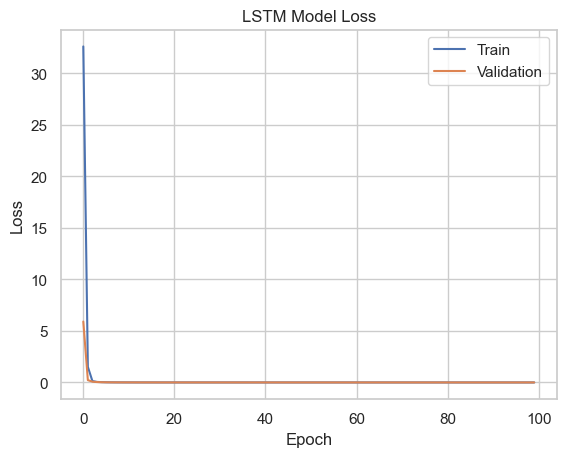

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

## Using BiLSTM with hyper-parameter tuning

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Function to create the BiLSTM model with variable parameters
def create_bilstm_model(n_units, learning_rate):
    model = Sequential()
    # Adding Bidirectional wrapper around LSTM
    model.add(Bidirectional(LSTM(units=n_units, activation='relu'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameter settings
param_sets = [
    {'n_units': 50, 'learning_rate': 0.01},
    {'n_units': 100, 'learning_rate': 0.001}
]

# X_train_reshaped, X_test_reshaped, y_train, and y_test are already defined

best_score = np.inf
best_params = None

for params in param_sets:
    model = create_bilstm_model(params['n_units'], params['learning_rate'])
    bi_lstm_history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_params = params

# Display the best parameters
print("Best parameters found:", best_params)

# Evaluate the model with best parameters
model_best = create_bilstm_model(best_params['n_units'], best_params['learning_rate'])
model_best.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=2, shuffle=False)
y_pred_best_bilstm = model_best.predict(X_test_reshaped)

mse_best = mean_squared_error(y_test, y_pred_best_bilstm)
r2_best = r2_score(y_test, y_pred_best_bilstm)
mae_best = mean_absolute_error(y_test, y_pred_best_bilstm)
rmse_best = math.sqrt(mse_best)

print(f"Optimized BiLSTM Mean Squared Error (MSE): {mse_best}")
print(f"Optimized BiLSTM R-squared (R2): {r2_best}")
print(f"Optimized BiLSTM Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized BiLSTM Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Best parameters found: {'n_units': 100, 'learning_rate': 0.001}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


772/772 - 9s - 12ms/step - loss: 20.0380
Epoch 2/100
772/772 - 3s - 4ms/step - loss: 0.2139
Epoch 3/100
772/772 - 3s - 4ms/step - loss: 0.0965
Epoch 4/100
772/772 - 3s - 4ms/step - loss: 0.0519
Epoch 5/100
772/772 - 3s - 4ms/step - loss: 0.0299
Epoch 6/100
772/772 - 3s - 4ms/step - loss: 0.0174
Epoch 7/100
772/772 - 3s - 4ms/step - loss: 0.0096
Epoch 8/100
772/772 - 3s - 4ms/step - loss: 0.0057
Epoch 9/100
772/772 - 3s - 4ms/step - loss: 0.0038
Epoch 10/100
772/772 - 3s - 4ms/step - loss: 0.0027
Epoch 11/100
772/772 - 3s - 4ms/step - loss: 0.0021
Epoch 12/100
772/772 - 3s - 4ms/step - loss: 0.0016
Epoch 13/100
772/772 - 3s - 4ms/step - loss: 0.0013
Epoch 14/100
772/772 - 3s - 4ms/step - loss: 0.0012
Epoch 15/100
772/772 - 3s - 4ms/step - loss: 0.0011
Epoch 16/100
772/772 - 3s - 4ms/step - loss: 9.8436e-04
Epoch 17/100
772/772 - 3s - 4ms/step - loss: 8.9215e-04
Epoch 18/100
772/772 - 3s - 4ms/step - loss: 8.1128e-04
Epoch 19/100
772/772 - 3s - 4ms/step - loss: 7.3240e-04
Epoch 20/100
77

## Model loss for BiLSTM

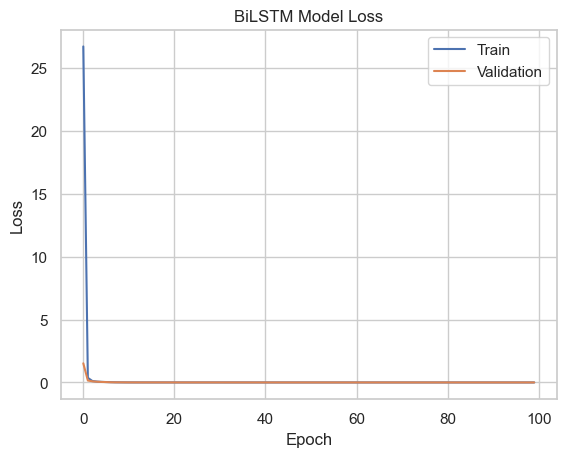

In [75]:
plt.plot(bi_lstm_history.history['loss'])
plt.plot(bi_lstm_history.history['val_loss'])
plt.title('BiLSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

## Using TCN WITH hyper-parameter tunning

In [77]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, Activation, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Function to create the TCN model with variable parameters
def create_tcn_model(n_filters, kernel_size, learning_rate):
    model = Sequential([
        Conv1D(filters=n_filters, kernel_size=kernel_size, padding='causal', activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dropout(0.2),
        Conv1D(filters=n_filters, kernel_size=kernel_size, padding='causal', activation='relu'),
        Dropout(0.2),
        GlobalAveragePooling1D(),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameter setting
param_sets = [
    {'n_filters': 32, 'kernel_size': 2, 'learning_rate': 0.01},
    {'n_filters': 64, 'kernel_size': 2, 'learning_rate': 0.001},
    # Add more parameter sets as needed
]

best_score = np.inf
best_params = None

for params in param_sets:
    model = create_tcn_model(params['n_filters'], params['kernel_size'], params['learning_rate'])
    tcn_history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_data=(X_test_reshaped, y_test), verbose=0, shuffle=False)
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_params = params

# Display the best parameters
print("Best parameters found:", best_params)

# Evaluate the model with best parameters
model_best = create_tcn_model(best_params['n_filters'], best_params['kernel_size'], best_params['learning_rate'])
model_best.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=2, shuffle=False)
y_pred_best_tcn = model_best.predict(X_test_reshaped)

mse_best = mean_squared_error(y_test, y_pred_best_tcn)
r2_best = r2_score(y_test, y_pred_best_tcn)
mae_best = mean_absolute_error(y_test, y_pred_best_tcn)
rmse_best = math.sqrt(mse_best)

print(f"Optimized TCN Mean Squared Error (MSE): {mse_best}")
print(f"Optimized TCN R-squared (R2): {r2_best}")
print(f"Optimized TCN Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized TCN Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Best parameters found: {'n_filters': 64, 'kernel_size': 2, 'learning_rate': 0.001}


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
772/772 - 6s - 7ms/step - loss: 13.3511
Epoch 2/100
772/772 - 3s - 4ms/step - loss: 1.3447
Epoch 3/100
772/772 - 3s - 4ms/step - loss: 1.2035
Epoch 4/100
772/772 - 3s - 4ms/step - loss: 1.1248
Epoch 5/100
772/772 - 3s - 4ms/step - loss: 1.0971
Epoch 6/100
772/772 - 3s - 4ms/step - loss: 1.0626
Epoch 7/100
772/772 - 3s - 4ms/step - loss: 0.9957
Epoch 8/100
772/772 - 4s - 5ms/step - loss: 0.9698
Epoch 9/100
772/772 - 3s - 4ms/step - loss: 0.9116
Epoch 10/100
772/772 - 4s - 5ms/step - loss: 0.9322
Epoch 11/100
772/772 - 4s - 5ms/step - loss: 0.8463
Epoch 12/100
772/772 - 3s - 4ms/step - loss: 0.8360
Epoch 13/100
772/772 - 4s - 5ms/step - loss: 0.8376
Epoch 14/100
772/772 - 4s - 5ms/step - loss: 0.8342
Epoch 15/100
772/772 - 4s - 5ms/step - loss: 0.8169
Epoch 16/100
772/772 - 5s - 6ms/step - loss: 0.7619
Epoch 17/100
772/772 - 3s - 5ms/step - loss: 0.7708
Epoch 18/100
772/772 - 3s - 4ms/step - loss: 0.7892
Epoch 19/100
772/772 - 4s - 5ms/step - loss: 0.7609
Epoch 20/100
772/772

## Model loss for TCN

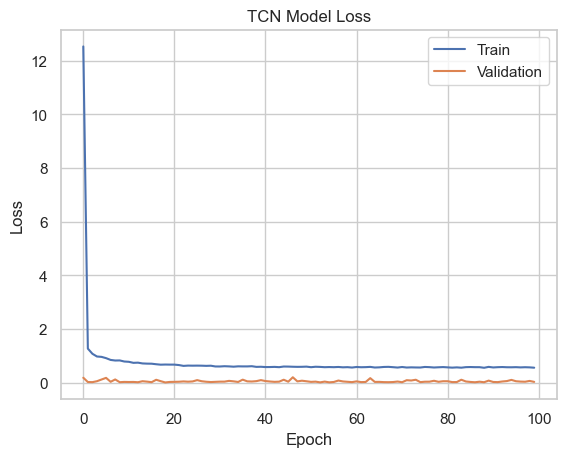

In [78]:
plt.plot(tcn_history.history['loss'])
plt.plot(tcn_history.history['val_loss'])
plt.title('TCN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

## Using MLP WITH Hyper-parameter tunning

In [79]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

def create_model(layer_sizes, dropout_rate, learning_rate):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(X_train_array.shape[1],)))
    model.add(Dropout(dropout_rate))
    
    for size in layer_sizes[1:]:
        model.add(Dense(size, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameters setting
param_options = [
    {'layer_sizes': [128, 64], 'dropout_rate': 0.2, 'learning_rate': 0.01},
    {'layer_sizes': [64, 32], 'dropout_rate': 0.1, 'learning_rate': 0.001},
    # Add more configurations as needed
]

best_score = np.inf
best_config = None

for config in param_options:
    model = create_model(config['layer_sizes'], config['dropout_rate'], config['learning_rate'])
    mlp_history = model.fit(X_train_array, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=0, shuffle=False)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_config = config

# Display the best configuration
print("Best configuration found:", best_config)

# Evaluate the model with the best configuration
best_model = create_model(best_config['layer_sizes'], best_config['dropout_rate'], best_config['learning_rate'])
history = best_model.fit(X_train_array, y_train, epochs=100, batch_size=72, verbose=2, shuffle=False)
y_pred_best_mlp = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best_mlp)
r2_best = r2_score(y_test, y_pred_best_mlp)
mae_best = mean_absolute_error(y_test, y_pred_best_mlp)
rmse_best = math.sqrt(mse_best)

print(f"Optimized MLP Mean Squared Error (MSE): {mse_best}")
print(f"Optimized MLP R-squared (R2): {r2_best}")
print(f"Optimized MLP Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized MLP Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best configuration found: {'layer_sizes': [64, 32], 'dropout_rate': 0.1, 'learning_rate': 0.001}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


772/772 - 4s - 5ms/step - loss: 14.8237
Epoch 2/100
772/772 - 2s - 2ms/step - loss: 1.2489
Epoch 3/100
772/772 - 2s - 2ms/step - loss: 1.0062
Epoch 4/100
772/772 - 2s - 2ms/step - loss: 0.8505
Epoch 5/100
772/772 - 2s - 2ms/step - loss: 0.7958
Epoch 6/100
772/772 - 2s - 2ms/step - loss: 0.7558
Epoch 7/100
772/772 - 1s - 2ms/step - loss: 0.7701
Epoch 8/100
772/772 - 2s - 2ms/step - loss: 0.7529
Epoch 9/100
772/772 - 2s - 2ms/step - loss: 0.7107
Epoch 10/100
772/772 - 2s - 2ms/step - loss: 0.6904
Epoch 11/100
772/772 - 2s - 2ms/step - loss: 0.6638
Epoch 12/100
772/772 - 2s - 2ms/step - loss: 0.6451
Epoch 13/100
772/772 - 2s - 2ms/step - loss: 0.6497
Epoch 14/100
772/772 - 2s - 2ms/step - loss: 0.6321
Epoch 15/100
772/772 - 2s - 2ms/step - loss: 0.6413
Epoch 16/100
772/772 - 2s - 2ms/step - loss: 0.6160
Epoch 17/100
772/772 - 1s - 2ms/step - loss: 0.6101
Epoch 18/100
772/772 - 2s - 2ms/step - loss: 0.6171
Epoch 19/100
772/772 - 2s - 2ms/step - loss: 0.5808
Epoch 20/100
772/772 - 2s - 2ms/

## Model Loss for MLP

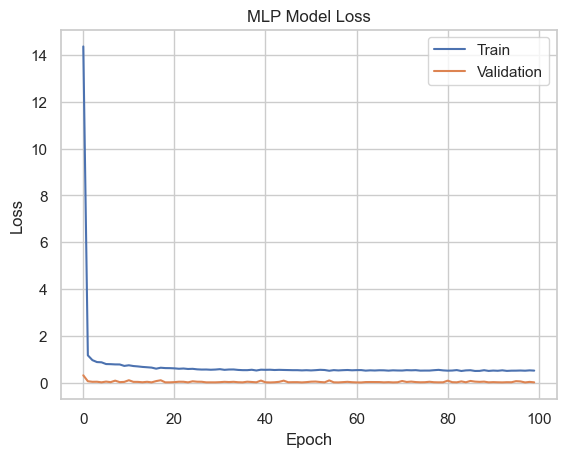

In [93]:
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])
plt.title('MLP Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

## Using ANN WITH hyper-parameter tunning

In [81]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Function to create the ANN model with variable parameters
def create_ann_model(neurons_layer1, neurons_layer2, learning_rate):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_shape=(X_train_array.shape[1],)),
        Dense(neurons_layer2, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameter setting
param_sets = [
    {'neurons_layer1': 64, 'neurons_layer2': 32, 'learning_rate': 0.01},
    {'neurons_layer1': 128, 'neurons_layer2': 64, 'learning_rate': 0.001},
    # Add more configurations as needed
]

best_score = np.inf
best_config = None

for config in param_sets:
    model = create_ann_model(config['neurons_layer1'], config['neurons_layer2'], config['learning_rate'])
    ann_history = model.fit(X_train_array, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0, shuffle=True)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_config = config

# Display the best configuration
print("Best configuration found:", best_config)

# Evaluate the model with the best configuration
best_model = create_ann_model(best_config['neurons_layer1'], best_config['neurons_layer2'], best_config['learning_rate'])
history_best = best_model.fit(X_train_array, y_train, epochs=100, batch_size=64, verbose=2, shuffle=True)
y_pred_best_ann = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best_ann)
r2_best = r2_score(y_test, y_pred_best_ann)
mae_best = mean_absolute_error(y_test, y_pred_best_ann)
rmse_best = math.sqrt(mse_best)

print(f"Optimized ANN Mean Squared Error (MSE): {mse_best}")
print(f"Optimized ANN R-squared (R2): {r2_best}")
print(f"Optimized ANN Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized ANN Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Best configuration found: {'neurons_layer1': 64, 'neurons_layer2': 32, 'learning_rate': 0.01}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


869/869 - 4s - 5ms/step - loss: 2.0576
Epoch 2/100
869/869 - 2s - 3ms/step - loss: 0.0068
Epoch 3/100
869/869 - 2s - 3ms/step - loss: 0.0097
Epoch 4/100
869/869 - 2s - 2ms/step - loss: 0.0068
Epoch 5/100
869/869 - 2s - 3ms/step - loss: 0.0134
Epoch 6/100
869/869 - 2s - 3ms/step - loss: 0.0042
Epoch 7/100
869/869 - 2s - 3ms/step - loss: 0.0153
Epoch 8/100
869/869 - 2s - 3ms/step - loss: 0.0052
Epoch 9/100
869/869 - 2s - 3ms/step - loss: 0.0098
Epoch 10/100
869/869 - 2s - 3ms/step - loss: 0.0017
Epoch 11/100
869/869 - 2s - 2ms/step - loss: 0.0059
Epoch 12/100
869/869 - 2s - 3ms/step - loss: 0.0156
Epoch 13/100
869/869 - 2s - 3ms/step - loss: 3.4194e-04
Epoch 14/100
869/869 - 2s - 3ms/step - loss: 0.0047
Epoch 15/100
869/869 - 2s - 3ms/step - loss: 0.0058
Epoch 16/100
869/869 - 2s - 3ms/step - loss: 0.0063
Epoch 17/100
869/869 - 2s - 3ms/step - loss: 0.0114
Epoch 18/100
869/869 - 2s - 2ms/step - loss: 6.8969e-04
Epoch 19/100
869/869 - 2s - 3ms/step - loss: 0.0124
Epoch 20/100
869/869 - 2s

## Model Loss for ANN

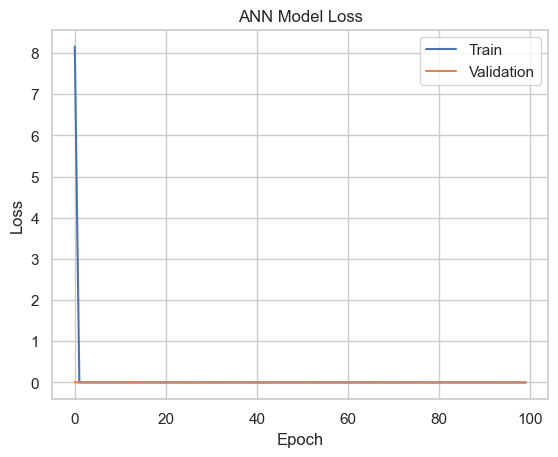

In [95]:
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

## Using GRU with hyper-parameter tunning

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
import numpy as np

def create_gru_model(n_units, learning_rate):
    model = Sequential([
        GRU(n_units, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameter setting
param_sets = [
    {'n_units': 50, 'learning_rate': 0.01},
    {'n_units': 100, 'learning_rate': 0.001},
    # Add more configurations as needed
]

best_score = np.inf
best_config = None

for config in param_sets:
    model = create_gru_model(config['n_units'], config['learning_rate'])
    gru_history = model.fit(X_train_reshaped, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=0, shuffle=True)  # Adjusted for quicker iteration
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_config = config

# Display the best configuration
print("Best configuration found:", best_config)

# Evaluate the model with the best configuration
best_model = create_gru_model(best_config['n_units'], best_config['learning_rate'])
history_best = best_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, verbose=2, shuffle=True)  # Adjust epochs and batch_size as needed
y_pred_best_gru = best_model.predict(X_test_reshaped)

mse_best = mean_squared_error(y_test, y_pred_best_gru)
r2_best = r2_score(y_test, y_pred_best_gru)
mae_best = mean_absolute_error(y_test, y_pred_best_gru)
rmse_best = math.sqrt(mse_best)

print(f"Optimized GRU Mean Squared Error (MSE): {mse_best}")
print(f"Optimized GRU R-squared (R2): {r2_best}")
print(f"Optimized GRU Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized GRU Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best configuration found: {'n_units': 50, 'learning_rate': 0.01}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


869/869 - 4s - 4ms/step - loss: 4.6860
Epoch 2/100
869/869 - 2s - 2ms/step - loss: 0.0051
Epoch 3/100
869/869 - 1s - 2ms/step - loss: 0.0017
Epoch 4/100
869/869 - 2s - 2ms/step - loss: 0.0014
Epoch 5/100
869/869 - 2s - 2ms/step - loss: 0.0020
Epoch 6/100
869/869 - 1s - 2ms/step - loss: 0.0016
Epoch 7/100
869/869 - 1s - 2ms/step - loss: 0.0019
Epoch 8/100
869/869 - 2s - 2ms/step - loss: 0.0015
Epoch 9/100
869/869 - 1s - 2ms/step - loss: 0.0017
Epoch 10/100
869/869 - 1s - 2ms/step - loss: 0.0014
Epoch 11/100
869/869 - 2s - 2ms/step - loss: 0.0014
Epoch 12/100
869/869 - 2s - 2ms/step - loss: 0.0018
Epoch 13/100
869/869 - 2s - 2ms/step - loss: 0.0013
Epoch 14/100
869/869 - 2s - 2ms/step - loss: 0.0015
Epoch 15/100
869/869 - 2s - 2ms/step - loss: 0.0011
Epoch 16/100
869/869 - 2s - 2ms/step - loss: 0.0011
Epoch 17/100
869/869 - 1s - 2ms/step - loss: 0.0015
Epoch 18/100
869/869 - 1s - 2ms/step - loss: 0.0011
Epoch 19/100
869/869 - 1s - 2ms/step - loss: 0.0014
Epoch 20/100
869/869 - 2s - 2ms/s

## Model Loss for GRU

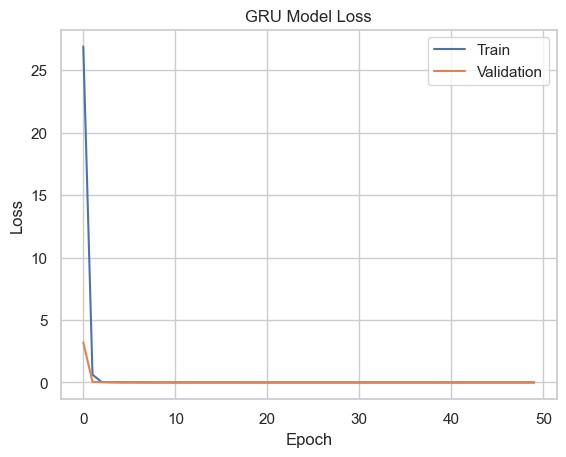

In [96]:
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('GRU Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

## Using Transformer

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

def transformer_block(inputs, num_heads, ff_dim, dropout_rate):
    # Multi-head self-attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)
    
    # Feed-forward network
    ffn_output = tf.keras.Sequential([
        Dense(ff_dim, activation="relu"),
        Dense(inputs.shape[-1]),
        Dropout(dropout_rate)
    ])(attention_output)
    ffn_output = LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)
    return ffn_output

def create_transformer_model(num_heads, ff_dim, learning_rate, input_shape, dropout_rate=0.1):
    inputs = Input(shape=input_shape)
    x = transformer_block(inputs, num_heads, ff_dim, dropout_rate)
    x = GlobalAveragePooling1D()(x)  # Pooling layer to reduce sequence length
    x = Dense(1)(x)  # Output layer for regression
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Parameter settings
param_sets = [
    {'num_heads': 4, 'ff_dim': 64, 'learning_rate': 0.01},
    {'num_heads': 8, 'ff_dim': 128, 'learning_rate': 0.001},
    # Add more parameter sets as needed
]

# X_train_reshaped, X_test_reshaped, y_train, and y_test are already defined
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])  # Assuming the input shape is properly defined

best_score = np.inf
best_params = None

for params in param_sets:
    model = create_transformer_model(params['num_heads'], params['ff_dim'], params['learning_rate'], input_shape)
    trsf_history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_data=(X_test_reshaped, y_test), verbose=0, shuffle=False)
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_params = params

# Display the best parameters
print("Best parameters found:", best_params)

# Evaluate the model with best parameters
model_best = create_transformer_model(best_params['num_heads'], best_params['ff_dim'], best_params['learning_rate'], input_shape)
model_best.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=2, shuffle=False)
y_pred_best_trf = model_best.predict(X_test_reshaped)

mse_best = mean_squared_error(y_test, y_pred_best_trf)
r2_best = r2_score(y_test, y_pred_best_trf)
mae_best = mean_absolute_error(y_test, y_pred_best_trf)
rmse_best = math.sqrt(mse_best)

print(f"Optimized Transformer Mean Squared Error (MSE): {mse_best}")
print(f"Optimized Transformer R-squared (R2): {r2_best}")
print(f"Optimized Transformer Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized Transformer Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (72, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (72, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


  1/435 ━━━━━━━━━━━━━━━━━━━━ 1:30 208ms/step

C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (72, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (72, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sig

 26/435 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step    

C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Best parameters found: {'num_heads': 8, 'ff_dim': 128, 'learning_rate': 0.001}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (72, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


772/772 - 7s - 9ms/step - loss: 28.5603
Epoch 2/100
772/772 - 4s - 5ms/step - loss: 2.5349
Epoch 3/100
772/772 - 3s - 5ms/step - loss: 0.5539
Epoch 4/100
772/772 - 3s - 3ms/step - loss: 0.3289
Epoch 5/100
772/772 - 4s - 5ms/step - loss: 0.3107
Epoch 6/100
772/772 - 4s - 5ms/step - loss: 0.2361
Epoch 7/100
772/772 - 3s - 4ms/step - loss: 0.2465
Epoch 8/100
772/772 - 3s - 4ms/step - loss: 0.1855
Epoch 9/100
772/772 - 3s - 4ms/step - loss: 0.1850
Epoch 10/100
772/772 - 3s - 4ms/step - loss: 0.1544
Epoch 11/100
772/772 - 3s - 4ms/step - loss: 0.1622
Epoch 12/100
772/772 - 3s - 4ms/step - loss: 0.1586
Epoch 13/100
772/772 - 3s - 4ms/step - loss: 0.1564
Epoch 14/100
772/772 - 3s - 4ms/step - loss: 0.1252
Epoch 15/100
772/772 - 3s - 4ms/step - loss: 0.1226
Epoch 16/100
772/772 - 3s - 4ms/step - loss: 0.1264
Epoch 17/100
772/772 - 4s - 5ms/step - loss: 0.1164
Epoch 18/100
772/772 - 3s - 4ms/step - loss: 0.1159
Epoch 19/100
772/772 - 3s - 4ms/step - loss: 0.1207
Epoch 20/100
772/772 - 3s - 4ms/

C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 8, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Optimized Transformer Mean Squared Error (MSE): 0.01845197599657291
Optimized Transformer R-squared (R2): 0.9996827552674133
Optimized Transformer Mean Absolute Error (MAE): 0.0680723685442523
Optimized Transformer Root Mean Square Error (RMSE): 0.1358380506212192


## Model Loss for Transformer

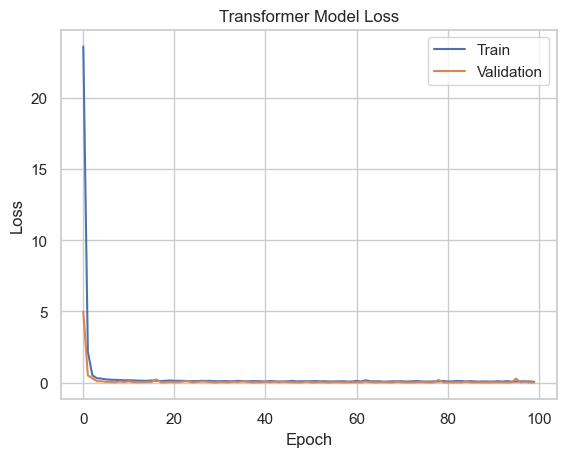

In [97]:
plt.plot(trsf_history.history['loss'])
plt.plot(trsf_history.history['val_loss'])
plt.title('Transformer Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

## Hybrid of ML-ML (MLR-DT) Using Stacking method

In [76]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Splitting the dataset into a new training and validation set for base model predictions
X_train_base, X_val, y_train_base, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the base models
model_lin = LinearRegression()
model_dt = DecisionTreeRegressor(random_state=42)

# Fit the base models
model_lin.fit(X_train_base, y_train_base)
model_dt.fit(X_train_base, y_train_base)

# Predictions on the validation set
y_pred_lin = model_lin.predict(X_val)
y_pred_dt = model_dt.predict(X_val)

# Creating a new feature set for the meta-regressor based on base model predictions
# Here, we stack the predictions from each model as features for the meta-regressor
import numpy as np
X_meta_train = np.column_stack((y_pred_lin, y_pred_dt))

# Train the meta-regressor on the predictions made by the base models
meta_regressor = Ridge()  # Using Ridge as a simple example; you can select other models
meta_regressor.fit(X_meta_train, y_val)

# Making predictions with base models on the test set
y_pred_lin_test = model_lin.predict(X_test)
y_pred_dt_test = model_dt.predict(X_test)

# Stack predictions to create meta-features for final predictions
X_meta_test = np.column_stack((y_pred_lin_test, y_pred_dt_test))

# Final predictions from the meta-regressor
final_stacking_predictions = meta_regressor.predict(X_meta_test)

# Evaluation
mse_final = mean_squared_error(y_test, final_stacking_predictions)
r2_final = r2_score(y_test, final_stacking_predictions)
mae_final = mean_absolute_error(y_test, final_stacking_predictions)
rmse_final = np.sqrt(mse_final)

print("Final Stacked Model Evaluation")
print(f"Mean Squared Error (MSE): {mse_final}")
print(f"R-squared (R2): {r2_final}")
print(f"Mean Absolute Error (MAE): {mae_final}")
print(f"Root Mean Square Error (RMSE): {rmse_final}")


Final Stacked Model Evaluation
Mean Squared Error (MSE): 9.459335863614469e-05
R-squared (R2): 0.9999983736568501
Mean Absolute Error (MAE): 0.0012164154992958733
Root Mean Square Error (RMSE): 0.009725911712335491


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## Hybrid ML-DL (MLR-LSTM) using stacking method

In [89]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Function to create the LSTM model
def create_lstm_model(n_units, learning_rate, input_shape):
    model = Sequential()
    model.add(LSTM(units=n_units, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return mse, r2, mae, rmse

# Hyperparameter grid
n_units_options = [50, 100, 150]
learning_rates = [0.01, 0.001, 0.0001]

best_score = float('inf')
best_params = None

for n_units in n_units_options:
    for lr in learning_rates:
        lstm_model = create_lstm_model(n_units, lr, (X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
        lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=0, shuffle=False, 
                       callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
        y_pred_lstm = lstm_model.predict(X_test_reshaped)
        
        # Train the Linear Regression model
        model_lin = LinearRegression()
        model_lin.fit(X_train, y_train)
        y_pred_linear = model_lin.predict(X_test)

        # Combine LSTM and MLR predictions for stacking
        combined_predictions = np.column_stack((y_pred_linear, y_pred_lstm.flatten()))

        # Meta-regressor: Another Linear Regression model
        meta_regressor = LinearRegression()
        meta_regressor.fit(combined_predictions, y_test)

        # Final predictions using the meta-regressor
        final_ml_dl_predictions = meta_regressor.predict(combined_predictions)

        # Evaluate the stacked model
        mse, r2, mae, rmse = evaluate_model(y_test, final_ml_dl_predictions)
        
        # Check if the current model is better
        if mse < best_score:
            best_score = mse
            best_params = (n_units, lr)
            print(f"New best model found: MSE={mse}, Params=(n_units={n_units}, lr={lr})")

print("Best parameters found:", best_params)
print("Best MSE:", best_score)


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


New best model found: MSE=8.777799256906971e-05, Params=(n_units=50, lr=0.01)


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
New best model found: MSE=8.650115762250129e-05, Params=(n_units=50, lr=0.001)


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


New best model found: MSE=7.591994988038987e-05, Params=(n_units=100, lr=0.01)


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best parameters found: (100, 0.01)
Best MSE: 7.591994988038987e-05


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Function to create the LSTM model
def create_lstm_model(n_units, learning_rate, input_shape):
    model = Sequential()
    model.add(LSTM(units=n_units, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return mse, r2, mae, rmse

# Hyperparameter grid (example values, adjust as necessary)
n_units_options = [50, 100, 150]
learning_rates = [0.01, 0.001, 0.0001]

best_score = float('inf')
best_params = None
best_metrics = {}

for n_units in n_units_options:
    for lr in learning_rates:
        lstm_model = create_lstm_model(n_units, lr, (X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
        lstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=0, shuffle=False, 
                       callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
        y_pred_lstm = lstm_model.predict(X_test_reshaped)
        
        # Train the Linear Regression model
        model_lin = LinearRegression()
        model_lin.fit(X_train, y_train)
        y_pred_linear = model_lin.predict(X_test)

        # Combine LSTM and MLR predictions for stacking
        combined_predictions = np.column_stack((y_pred_linear, y_pred_lstm.flatten()))

        # Meta-regressor: Another Linear Regression model
        meta_regressor = LinearRegression()
        meta_regressor.fit(combined_predictions, y_test)

        # Final predictions using the meta-regressor
        final_ml_dl_predictions = meta_regressor.predict(combined_predictions)

        # Evaluate the stacked model
        mse, r2, mae, rmse = evaluate_model(y_test, final_ml_dl_predictions)
        
        # Check if the current model is better
        if mse < best_score:
            best_score = mse
            best_params = (n_units, lr)
            best_metrics = {
                'MSE': mse,
                'R2': r2,
                'MAE': mae,
                'RMSE': rmse
            }
            print(f"New best model found: MSE={mse}, R2={r2}, MAE={mae}, RMSE={rmse}, Params=(n_units={n_units}, lr={lr})")

print("Best parameters found:", best_params)
print("Best Model Metrics:")
print(f"MSE: {best_metrics['MSE']}")
print(f"R2: {best_metrics['R2']}")
print(f"MAE: {best_metrics['MAE']}")
print(f"RMSE: {best_metrics['RMSE']}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
New best model found: MSE=7.383258251889837e-05, R2=0.9999987305967718, MAE=0.0016747556875701312, RMSE=0.008592588813558948, Params=(n_units=50, lr=0.01)


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step
Best parameters found: (50, 0.01)
Best Model Metrics:
MSE: 7.383258251889837e-05
R2: 0.9999987305967718
MAE: 0.0016747556875701312
RMSE: 0.008592588813558948


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Hybrid DL-DL (LSTM-GRU) using stacking method

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Function to create a hybrid LSTM and GRU model with variable parameters
def create_hybrid_lstm_gru_model(n_units, learning_rate):
    model = Sequential()
    # LSTM layer
    model.add(LSTM(n_units, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    # GRU layer, note that return_sequences is False by default, which is suitable here as it's the last recurrent layer
    model.add(GRU(n_units, activation='relu'))
    # Output layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameter settings
param_sets = [
    {'n_units': 50, 'learning_rate': 0.01},
    {'n_units': 100, 'learning_rate': 0.001}
]

best_score = np.inf
best_params = None

# Assuming X_train_reshaped, y_train, X_test_reshaped, and y_test are already defined
for params in param_sets:
    model = create_hybrid_lstm_gru_model(params['n_units'], params['learning_rate'])
    history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, validation_split=0.2, verbose=0, shuffle=False)
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_params = params

# Display the best parameters
print("Best parameters found:", best_params)

# Evaluate the model with best parameters
model_best = create_hybrid_lstm_gru_model(best_params['n_units'], best_params['learning_rate'])
model_best.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=2, shuffle=False)
y_pred_best_hybrid = model_best.predict(X_test_reshaped)

mse_best = mean_squared_error(y_test, y_pred_best_hybrid)
r2_best = r2_score(y_test, y_pred_best_hybrid)
mae_best = mean_absolute_error(y_test, y_pred_best_hybrid)
rmse_best = math.sqrt(mse_best)

print(f"Optimized Hybrid LSTM and GRU Model Mean Squared Error (MSE): {mse_best}")
print(f"Optimized Hybrid LSTM and GRU Model R-squared (R2): {r2_best}")
print(f"Optimized Hybrid LSTM and GRU Model Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized Hybrid LSTM and GRU Model Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Best parameters found: {'n_units': 100, 'learning_rate': 0.001}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


772/772 - 4s - 5ms/step - loss: 12.7413
Epoch 2/100
772/772 - 2s - 2ms/step - loss: 0.0495
Epoch 3/100
772/772 - 2s - 2ms/step - loss: 0.0117
Epoch 4/100
772/772 - 2s - 2ms/step - loss: 0.0083
Epoch 5/100
772/772 - 2s - 2ms/step - loss: 0.0072
Epoch 6/100
772/772 - 2s - 2ms/step - loss: 0.0068
Epoch 7/100
772/772 - 2s - 2ms/step - loss: 0.0060
Epoch 8/100
772/772 - 2s - 2ms/step - loss: 0.0054
Epoch 9/100
772/772 - 2s - 2ms/step - loss: 0.0044
Epoch 10/100
772/772 - 2s - 2ms/step - loss: 0.0039
Epoch 11/100
772/772 - 1s - 2ms/step - loss: 0.0034
Epoch 12/100
772/772 - 2s - 2ms/step - loss: 0.0029
Epoch 13/100
772/772 - 2s - 2ms/step - loss: 0.0025
Epoch 14/100
772/772 - 2s - 2ms/step - loss: 0.0020
Epoch 15/100
772/772 - 2s - 2ms/step - loss: 0.0018
Epoch 16/100
772/772 - 2s - 3ms/step - loss: 0.0017
Epoch 17/100
772/772 - 2s - 3ms/step - loss: 0.0015
Epoch 18/100
772/772 - 1s - 2ms/step - loss: 0.0015
Epoch 19/100
772/772 - 2s - 2ms/step - loss: 0.0014
Epoch 20/100
772/772 - 2s - 2ms/

In [91]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Function to create a hybrid LSTM and GRU model with variable parameters
def create_hybrid_lstm_gru_model(n_units, learning_rate):
    model = Sequential([
        LSTM(n_units, activation='relu', return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
        GRU(n_units, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return mse, r2, mae, rmse

# Hyperparameter grid
n_units_options = [50, 100, 150]  # Example unit options
learning_rates = [0.01, 0.001, 0.0001]  # Example learning rate options

best_score = float('inf')
best_params = None
best_metrics = {}

for n_units in n_units_options:
    for lr in learning_rates:
        model = create_hybrid_lstm_gru_model(n_units, lr)
        model.fit(X_train_reshaped, y_train, epochs=100, batch_size=72, verbose=0, shuffle=False, 
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
        y_pred = model.predict(X_test_reshaped)
        mse, r2, mae, rmse = evaluate_model(y_test, y_pred)
        
        if mse < best_score:
            best_score = mse
            best_params = {'n_units': n_units, 'learning_rate': lr}
            best_metrics = {'MSE': mse, 'R2': r2, 'MAE': mae, 'RMSE': rmse}
            print(f"New best model found with n_units={n_units}, lr={lr}, MSE={mse}, R2={r2}, MAE={mae}, RMSE={rmse}")

print("Best parameters found:", best_params)
print("Best Model Metrics:")
print(f"MSE: {best_metrics['MSE']}")
print(f"R2: {best_metrics['R2']}")
print(f"MAE: {best_metrics['MAE']}")
print(f"RMSE: {best_metrics['RMSE']}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
New best model found with n_units=50, lr=0.01, MSE=0.0001965969728353494, R2=0.9999966199092126, MAE=0.006368605102460307, RMSE=0.01402130424872627


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
New best model found with n_units=50, lr=0.001, MSE=0.00019086216308625634, R2=0.9999967185077685, MAE=0.009759696053068864, RMSE=0.013815287296551466


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
New best model found with n_units=100, lr=0.01, MSE=8.713315492319283e-05, R2=0.9999985019200958, MAE=0.0032255894877035464, RMSE=0.009334514177138134


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Best parameters found: {'n_units': 100, 'learning_rate': 0.01}
Best Model Metrics:
MSE: 8.713315492319283e-05
R2: 0.9999985019200958
MAE: 0.0032255894877035464
RMSE: 0.009334514177138134


## Hybrid DL-DL using LSTM and ANN using stacking method

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Function to create a hybrid LSTM and ANN model with variable parameters
def create_hybrid_lstm_ann_model(lstm_units, neurons_layer1, neurons_layer2, learning_rate):
    model = Sequential()
    # LSTM layer for processing sequence data
    model.add(LSTM(lstm_units, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    # Dense layers for further processing and pattern recognition after LSTM processing
    model.add(Dense(neurons_layer1, activation='relu'))
    model.add(Dense(neurons_layer2, activation='relu'))
    # Output layer
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# parameter setting for hybrid model
param_sets = [
    {'lstm_units': 50, 'neurons_layer1': 64, 'neurons_layer2': 32, 'learning_rate': 0.01},
    {'lstm_units': 100, 'neurons_layer1': 128, 'neurons_layer2': 64, 'learning_rate': 0.001},
    # Add more configurations as needed
]

best_score = np.inf
best_config = None

# Assuming X_train_reshaped, y_train, X_test_reshaped, and y_test are already defined
for config in param_sets:
    model = create_hybrid_lstm_ann_model(config['lstm_units'], config['neurons_layer1'], config['neurons_layer2'], config['learning_rate'])
    history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=0, shuffle=True)
    y_pred = model.predict(X_test_reshaped)
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_config = config

# Display the best configuration
print("Best configuration found:", best_config)

# Evaluate the model with the best configuration
best_model = create_hybrid_lstm_ann_model(best_config['lstm_units'], best_config['neurons_layer1'], best_config['neurons_layer2'], best_config['learning_rate'])
history_best = best_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, verbose=2, shuffle=True)
y_pred_best_hybrid2 = best_model.predict(X_test_reshaped)

mse_best = mean_squared_error(y_test, y_pred_best_hybrid2)
r2_best = r2_score(y_test, y_pred_best_hybrid2)
mae_best = mean_absolute_error(y_test, y_pred_best_hybrid2)
rmse_best = math.sqrt(mse_best)

print(f"Optimized Hybrid LSTM and ANN Model Mean Squared Error (MSE): {mse_best}")
print(f"Optimized Hybrid LSTM and ANN Model R-squared (R2): {r2_best}")
print(f"Optimized Hybrid LSTM and ANN Model Mean Absolute Error (MAE): {mae_best}")
print(f"Optimized Hybrid LSTM and ANN Model Root Mean Square Error (RMSE): {rmse_best}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best configuration found: {'lstm_units': 50, 'neurons_layer1': 64, 'neurons_layer2': 32, 'learning_rate': 0.01}
Epoch 1/100


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


869/869 - 3s - 3ms/step - loss: 2.6746
Epoch 2/100
869/869 - 1s - 2ms/step - loss: 0.0083
Epoch 3/100
869/869 - 1s - 1ms/step - loss: 0.0239
Epoch 4/100
869/869 - 1s - 1ms/step - loss: 0.0096
Epoch 5/100
869/869 - 1s - 1ms/step - loss: 0.0195
Epoch 6/100
869/869 - 1s - 1ms/step - loss: 0.0244
Epoch 7/100
869/869 - 1s - 1ms/step - loss: 0.0159
Epoch 8/100
869/869 - 1s - 2ms/step - loss: 0.0118
Epoch 9/100
869/869 - 1s - 1ms/step - loss: 0.0204
Epoch 10/100
869/869 - 1s - 1ms/step - loss: 0.0147
Epoch 11/100
869/869 - 1s - 2ms/step - loss: 0.0149
Epoch 12/100
869/869 - 1s - 1ms/step - loss: 0.0265
Epoch 13/100
869/869 - 1s - 1ms/step - loss: 0.0027
Epoch 14/100
869/869 - 1s - 1ms/step - loss: 0.0140
Epoch 15/100
869/869 - 1s - 1ms/step - loss: 0.0107
Epoch 16/100
869/869 - 1s - 1ms/step - loss: 0.0110
Epoch 17/100
869/869 - 1s - 1ms/step - loss: 0.0054
Epoch 18/100
869/869 - 1s - 1ms/step - loss: 0.0069
Epoch 19/100
869/869 - 1s - 1ms/step - loss: 0.0210
Epoch 20/100
869/869 - 1s - 1ms/s

In [88]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Function to create a hybrid LSTM and ANN model
def create_hybrid_lstm_ann_model(lstm_units, neurons_layer1, neurons_layer2, learning_rate):
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(neurons_layer1, activation='relu'))
    model.add(Dense(neurons_layer2, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return mse, r2, mae, rmse

# Hyperparameter grid
param_sets = [
    {'lstm_units': 50, 'neurons_layer1': 64, 'neurons_layer2': 32, 'learning_rate': 0.01},
    {'lstm_units': 100, 'neurons_layer1': 128, 'neurons_layer2': 64, 'learning_rate': 0.001},
    {'lstm_units': 150, 'neurons_layer1': 128, 'neurons_layer2': 64, 'learning_rate': 0.0001}
]

best_score = np.inf
best_config = None
best_metrics = {}

for config in param_sets:
    model = create_hybrid_lstm_ann_model(config['lstm_units'], config['neurons_layer1'], config['neurons_layer2'], config['learning_rate'])
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, verbose=0, shuffle=True, 
              callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])
    y_pred = model.predict(X_test_reshaped)
    mse, r2, mae, rmse = evaluate_model(y_test, y_pred)
    
    if mse < best_score:
        best_score = mse
        best_config = config
        best_metrics = {'MSE': mse, 'R2': r2, 'MAE': mae, 'RMSE': rmse}
        print(f"New best model found: MSE={mse}, R2={r2}, MAE={mae}, RMSE={rmse}, Params={config}")

print("Best configuration found:", best_config)
print("Best Model Metrics:")
print(f"MSE: {best_metrics['MSE']}")
print(f"R2: {best_metrics['R2']}")
print(f"MAE: {best_metrics['MAE']}")
print(f"RMSE: {best_metrics['RMSE']}")


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
New best model found: MSE=0.0001878905771661762, R2=0.9999967695982306, MAE=0.006363648177913136, RMSE=0.013707318379835503, Params={'lstm_units': 50, 'neurons_layer1': 64, 'neurons_layer2': 32, 'learning_rate': 0.01}


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\akinw\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best configuration found: {'lstm_units': 50, 'neurons_layer1': 64, 'neurons_layer2': 32, 'learning_rate': 0.01}
Best Model Metrics:
MSE: 0.0001878905771661762
R2: 0.9999967695982306
MAE: 0.006363648177913136
RMSE: 0.013707318379835503


## creating dataframe for actual and predicted values

In [87]:
# Creating a DataFrame to display actual vs predicted values
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_ml_dl_predictions
})

print(actual_vs_predicted.head(10))  # Display the first 10 results for checking

       Actual  Predicted
51167    5.20   5.204338
22846    0.13   0.128208
30915    4.17   4.173476
8011    24.99  24.988739
28563   20.94  20.944115
11541    0.00   0.001248
55679    2.54   2.537638
53501    0.00   0.000379
13279    7.40   7.396416
28825    0.00  -0.000672


## Visualising the predicted models

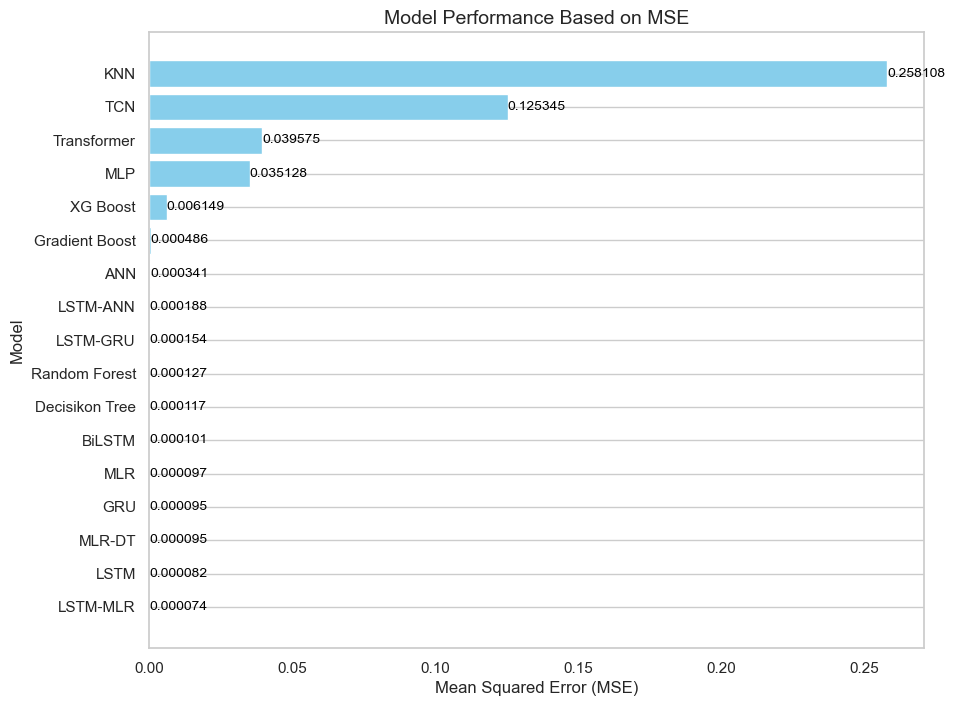

In [89]:
import matplotlib.pyplot as plt

# Model names
models = ['MLR', 'Random Forest', 'Decisikon Tree', 'KNN', 'Gradient Boost', 'XG Boost', 'LSTM',
          'BiLSTM', 'TCN', 'MLP', 'ANN', 'GRU', 'Transformer', 'MLR-DT', 'LSTM-MLR', 'LSTM-GRU', 'LSTM-ANN']

# Corresponding MSE values for each model
mse_values = [
    0.0000966239152115606,   # MLR
    0.0001266011119570871,   # Random Forest
    0.00011653311155138315,  # Decision Tree
    0.2581075028364876,      # KNN
    0.0004861137178933038,   # Gradient Boost
    0.006148735460335039,    # XG Boost
    0.0000823871995082247,   # LSTM
    0.00010130960292889658,  # BiLSTM
    0.1253448224391432,      # TCN
    0.035128065083655236,    # MLP
    0.0003414909691316563,   # ANN
    0.0000946487559375723,   # GRU
    0.03957535087056272,     # Transformer
    0.0000945933586361446,   # MLR-Decision Tree
    0.0000738325825188983,   # LSTM-MLR
    0.00015438254099467392,  # LSTM-GRU
    0.0001878905771661762,   # LSTM-ANN
]

# Sort the models and MSE values by MSE in ascending order
sorted_data = sorted(zip(models, mse_values), key=lambda x: x[1])

# Unzip the sorted data
sorted_models, sorted_mse_values = zip(*sorted_data)

# Create the bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_models, sorted_mse_values, color='skyblue')

# Adding the MSE values as text labels for each bar
for i, (model, mse) in enumerate(zip(sorted_models, sorted_mse_values)):
    plt.text(mse, i, f'{mse:.6f}', va='center', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Mean Squared Error (MSE)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Performance Based on MSE', fontsize=14)
plt.grid(axis='x')

plt.show()


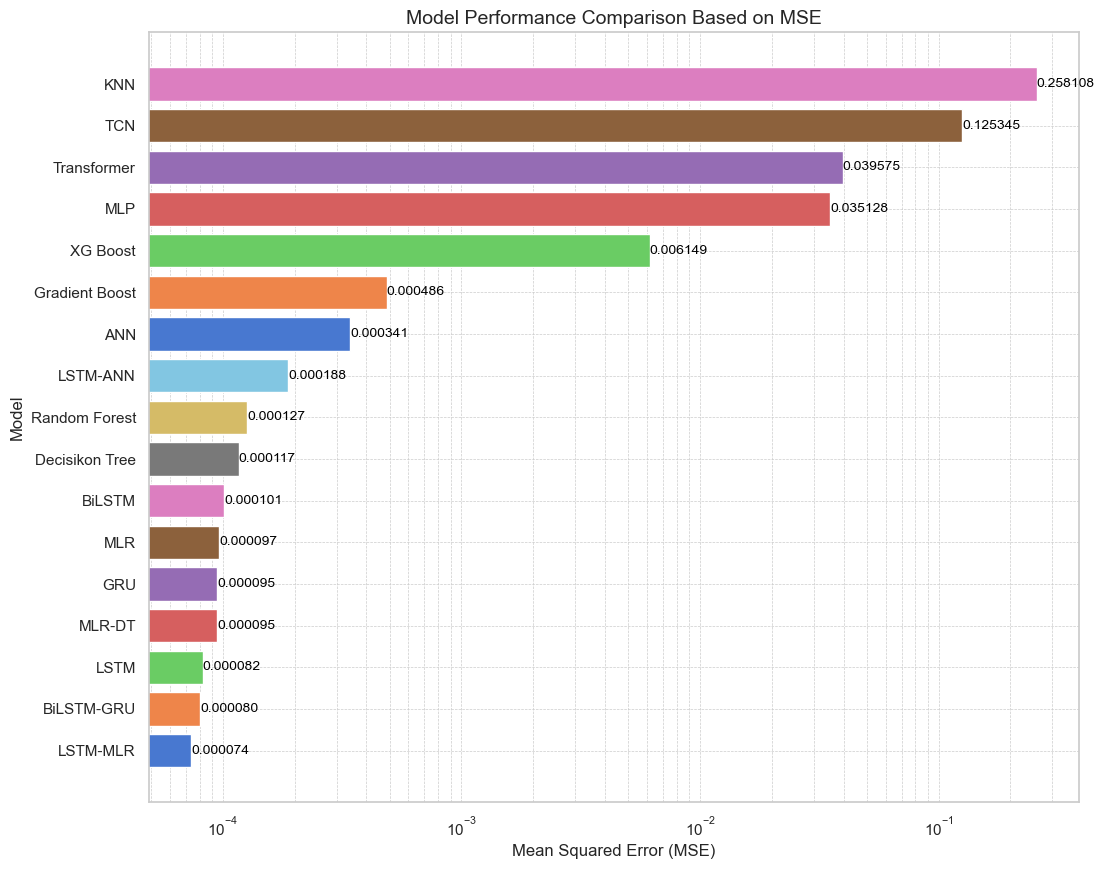

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Model names
models = ['MLR', 'Random Forest', 'Decisikon Tree', 'KNN', 'Gradient Boost', 'XG Boost', 'LSTM',
          'BiLSTM', 'TCN', 'MLP', 'ANN', 'GRU', 'Transformer', 'MLR-DT', 'LSTM-MLR', 'BiLSTM-GRU', 'LSTM-ANN']

# Corresponding MSE values for each model
mse_values = [
    0.0000966239152115606,   # MLR
    0.0001266011119570871,   # Random Forest
    0.00011653311155138315,  # Decision Tree
    0.2581075028364876,      # KNN
    0.0004861137178933038,   # Gradient Boostb
    0.006148735460335039,    # XG Boost
    0.0000823871995082247,   # LSTM
    0.00010130960292889658,  # BiLSTM
    0.1253448224391432,      # TCN
    0.035128065083655236,    # MLP
    0.0003414909691316563,   # ANN
    0.0000946487559375723,   # GRU
    0.03957535087056272,     # Transformer
    0.0000945933586361446,   # MLR-Decision Tree
    0.0000738325825188983,   # LSTM-MLR
    0.0000804705377191909,  # LSTM-GRU
    0.0001878905771661762,   # LSTM-ANN
]

# Sort the models and MSE values by MSE in ascending order
sorted_data = sorted(zip(models, mse_values), key=lambda x: x[1])
sorted_models, sorted_mse_values = zip(*sorted_data)

# Create the bar chart
plt.figure(figsize=(12, 10))
bars = plt.barh(sorted_models, sorted_mse_values, color=sns.color_palette("muted"))

# Convert MSE to a logarithmic scale for better visibility of smaller values
plt.xscale('log')

# Add the MSE values as text labels for each bar
for bar, mse in zip(bars, sorted_mse_values):
    plt.text(mse, bar.get_y() + bar.get_height()/2, f'{mse:.6f}', va='center', fontsize=10, color='black')

# Add labels and title
plt.xlabel('Mean Squared Error (MSE)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Performance Comparison Based on MSE', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


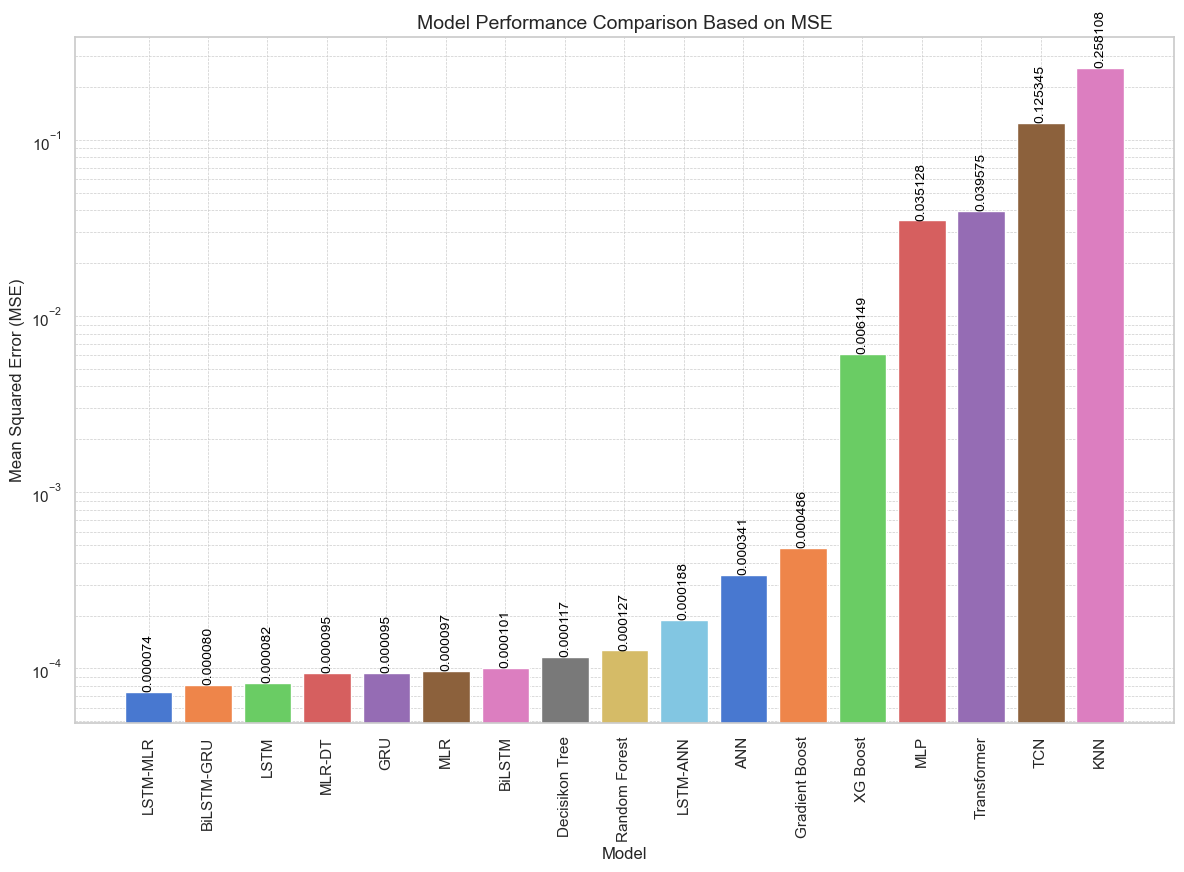

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Model names
models = ['MLR', 'Random Forest', 'Decisikon Tree', 'KNN', 'Gradient Boost', 'XG Boost', 'LSTM',
          'BiLSTM', 'TCN', 'MLP', 'ANN', 'GRU', 'Transformer', 'MLR-DT', 'LSTM-MLR', 'BiLSTM-GRU', 'LSTM-ANN']

# Corresponding MSE values for each model
mse_values = [
    0.0000966239152115606,   # MLR
    0.0001266011119570871,   # Random Forest
    0.00011653311155138315,  # Decision Tree
    0.2581075028364876,      # KNN
    0.0004861137178933038,   # Gradient Boost
    0.006148735460335039,    # XG Boost
    0.0000823871995082247,   # LSTM
    0.00010130960292889658,  # BiLSTM
    0.1253448224391432,      # TCN
    0.035128065083655236,    # MLP
    0.0003414909691316563,   # ANN
    0.0000946487559375723,   # GRU
    0.03957535087056272,     # Transformer
    0.0000945933586361446,   # MLR-Decision Tree
    0.0000738325825188983,   # LSTM-MLR
    0.0000804705377191909,  # LSTM-GRU
    0.0001878905771661762,   # LSTM-ANN
]

# Sort the models and MSE values by MSE in ascending order
sorted_data = sorted(zip(models, mse_values), key=lambda x: x[1])
sorted_models, sorted_mse_values = zip(*sorted_data)

# Create the bar chart with vertical bars
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_models, sorted_mse_values, color=sns.color_palette("muted"), width=0.8)  # Adjust the width parameter

# Convert MSE to a logarithmic scale for better visibility of smaller values
plt.yscale('log')

# Add the MSE values as text labels for each bar
for bar, mse in zip(bars, sorted_mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, mse, f'{mse:.6f}', ha='center', va='bottom', fontsize=10, color='black', rotation=90)

# Add labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.title('Model Performance Comparison Based on MSE', fontsize=14)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


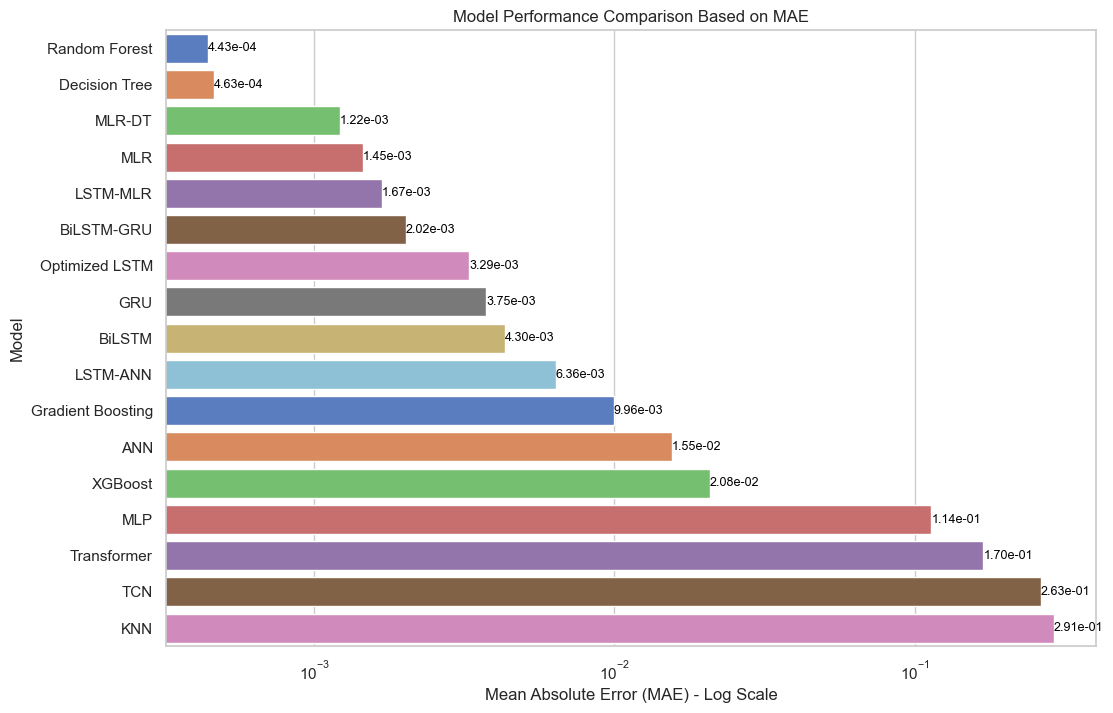

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the MAE values
data = {
    'Model': [
        'MLR', 'Random Forest', 'Decision Tree', 'KNN',
        'Gradient Boosting', 'XGBoost', 'Optimized LSTM', 'BiLSTM',
        'TCN', 'MLP', 'ANN', 'GRU',
        'Transformer', 'MLR-DT', 'LSTM-MLR', 'BiLSTM-GRU', 'LSTM-ANN'
    ],
    'MAE': [
        0.0014524492936606119, 0.0004434474539550122, 0.00046292565558630116, 0.29072296406857934,
        0.00995538322746402, 0.020754765499195877, 0.003285415900658423, 0.004303131667458964,
        0.26310049010418535, 0.1135776373869805, 0.01553027532993215, 0.0037465502138904422,
        0.1695022684616318, 0.0012164154992958733, 0.0016747556875701312, 0.0020224654366840854, 0.006363648177913136
    ]
}

df_mae = pd.DataFrame(data)

# Sort the DataFrame by MAE for ascending order plotting
df_mae = df_mae.sort_values('MAE', ascending=True)

# Set the style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook")

# Create the barplot with log scale
plt.figure(figsize=(12, 8))
mae_plot = sns.barplot(x='MAE', y='Model', data=df_mae, palette='muted')

# Set labels and title
plt.xlabel('Mean Absolute Error (MAE) - Log Scale')
plt.ylabel('Model')
plt.title('Model Performance Comparison Based on MAE')

# Add the data labels with a smaller font size
for index, value in enumerate(df_mae['MAE']):
    plt.text(value, index, f'{value:.2e}', color='black', va="center", fontsize=9)

# Adjust the x-axis to log scale
plt.xscale('log')

# Display the plot
plt.show()


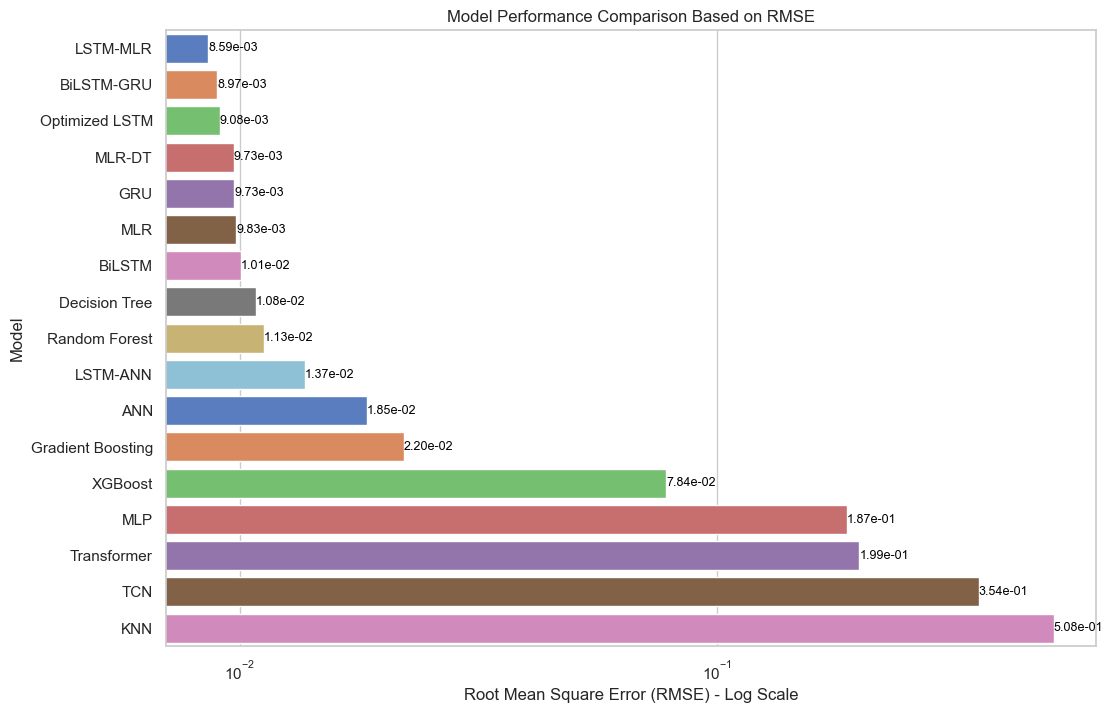

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the RMSE values
data = {
    'Model': [
        'MLR', 'Random Forest', 'Decision Tree', 'KNN',
        'Gradient Boosting', 'XGBoost', 'Optimized LSTM', 'BiLSTM',
        'TCN', 'MLP', 'ANN', 'GRU',
        'Transformer', 'MLR-DT', 'LSTM-MLR', 'BiLSTM-GRU', 'LSTM-ANN'
    ],
    'RMSE': [
        0.009829746446961928, 0.011251715956114744, 0.010795050326486817, 0.5080428159481124,
        0.02204798670838913, 0.07841387288187619, 0.009076739475617043, 0.010065267156359864,
        0.35404070731929005, 0.18742482515306033, 0.018479474265564382, 0.009728759218809575,
        0.19893554451269568, 0.009725911712335491, 0.008592588813558948, 0.008970537203489596, 0.013707318379835503
    ]
}

df_rmse = pd.DataFrame(data)

# Sort the DataFrame by RMSE for ascending order plotting
df_rmse = df_rmse.sort_values('RMSE', ascending=True)

# Set the style and context for the plot
sns.set(style="whitegrid")
sns.set_context("notebook")

# Create the barplot with log scale
plt.figure(figsize=(12, 8))
rmse_plot = sns.barplot(x='RMSE', y='Model', data=df_rmse, palette='muted')

# Set labels and title
plt.xlabel('Root Mean Square Error (RMSE) - Log Scale')
plt.ylabel('Model')
plt.title('Model Performance Comparison Based on RMSE')

# Add the data labels with a smaller font size
for index, value in enumerate(df_rmse['RMSE']):
    plt.text(value, index, f'{value:.2e}', color='black', va="center", fontsize=9)

# Adjust the x-axis to log scale
plt.xscale('log')

# Display the plot
plt.show()
